# Explore data

Load dependencies.

In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import glob

plt.style.use('dark_background')

Load metadata for the articles that matched my phrase queries (the data collected in query_nyt.ipynb).

In [4]:
phrase_data = pd.read_csv('data/all.csv')
phrase_data['keywords'] = phrase_data['keywords'].apply(literal_eval)
phrase_data['date'] = pd.to_datetime(phrase_data['date']) 
phrase_data

,headline,date,doc_type,material_type,news_desk,section,keywords,url,id,byline,deaf_and_dumb,deaf_mute,fell_on_deaf_ears,hearing_impaired,tone_deaf,deaf_as_a_post,stone_deaf,deaf
0,THE DEAF AND DUMB WAITER.,1885-12-03,article,Archives,None,Archives,[],https://www.nytimes.com/1885/12/03/archives/th...,nyt://article/0074c23c-1ff6-5bc7-85d9-e56a5af3...,NaN,True,False,False,False,False,False,False,False
1,Chad Threatens to Expel Sudanese Refugees,2006-04-14,article,News,International,World,[],https://www.nytimes.com/2006/04/14/world/chad-...,nyt://article/00bb19d7-2ba6-5072-8e6b-3159730d...,By Marc Lacey,True,False,False,False,False,False,False,False
2,WELFARE HOTEL CHILDREN: TOMORROW'S POOR,1987-07-16,article,News,Metropolitan Desk,New York,"[Homeless Persons, HOTELS AND MOTELS, Children...",https://www.nytimes.com/1987/07/16/nyregion/we...,nyt://article/01670df3-ae07-5eb6-8862-7bd834bf...,By Lydia Chavez,True,False,False,False,False,False,False,False
3,Wal-Mart Says Oil Prices Held Down Profits for...,2005-08-16,article,News,Business,Business Day,[Company Reports],https://www.nytimes.com/2005/08/16/business/wa...,nyt://article/0175ac61-cc62-5cdc-923c-f5efb8ec...,By Roben Farzad,True,False,False,False,False,False,False,False
4,"A Space Force? The Idea May Have Merit, Some Say",2018-06-23,article,News,Washington,U.S.,"[Space and Astronomy, United States Defense an...",https://www.nytimes.com/2018/06/23/us/politics...,nyt://article/01b8b8a5-7d0c-592a-a283-a9ccd3d8...,By Helene Cooper,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17340,Your Money; Claiming a Pet As a Deduction,1981-03-28,article,News,Financial Desk,Business Day,"[ANIMALS, Taxation, Income Tax, Handicapped]",https://www.nytimes.com/1981/03/28/business/yo...,nyt://article/8aa2aceb-e543-5691-b4cc-572cfada...,By Elizabeth M. Fowler,False,False,False,True,False,False,False,True
17341,"Your Typical Crowded, Swinging, Silent Bar Scene",1994-10-30,article,News,The City Weekly Desk,New York,"[Deafness, Bars]",https://www.nytimes.com/1994/10/30/nyregion/ne...,nyt://article/1aab92b9-5b05-50b7-bf7a-2b8cef19...,By Jennifer Kingson Bloom,False,False,False,True,False,False,False,True
17342,"‘Fargo’ Recap: Dead Dogs, Spiders and Pestilence",2014-04-30,article,News,Culture,Arts,[],https://artsbeat.blogs.nytimes.com/2014/04/29/...,nyt://article/3a6161c6-023a-5968-a28e-0ea2ecb6...,By Kate Phillips,False,False,False,True,False,False,False,True
17343,‘Singing’ With Their Hands,2012-02-11,article,News,Styles,Fashion & Style,"[Video Recordings and Downloads, Music, Sign L...",https://www.nytimes.com/2012/02/12/fashion/sin...,nyt://article/0918d106-bd33-59fe-a100-cd3f9a23...,By Austin Considine,False,False,False,True,False,False,False,True


In [66]:
phrases = phrase_data.columns[10:].tolist()
phrases

['deaf_and_dumb',
 'deaf_mute',
 'fell_on_deaf_ears',
 'hearing_impaired',
 'tone_deaf',
 'deaf_as_a_post',
 'stone_deaf',
 'deaf']

## Graph deaf articles as a ratio of total articles 

Load metadata for ALL articles. (Note: This data is missing ids and sections! This would need to be collected again.)

In [47]:
all_files = glob.glob("../metadata/*.csv")
all_data = {'id': [],
            'date': []}

def get_info(df):
    missing_ids = len(df[df['id'].isna()])
    missing_dates = len(df[df['date'].isna()])
    if missing_ids > 0:
        print('Missing ID values: ' + str(missing_ids))
    if missing_dates > 0: 
        print('Missing date values: ' + str(missing_dates))
    all_data['id'] += df['id'].tolist()
    all_data['date'] += df['date'].tolist()
    
for f in all_files:
    print(f)
    get_info(pd.read_csv(f, parse_dates=['date']))

../metadata/1851-10.csv
../metadata/1851-11.csv
../metadata/1851-12.csv
../metadata/1851-9.csv
../metadata/1852-1.csv
../metadata/1852-10.csv
../metadata/1852-11.csv
../metadata/1852-12.csv
../metadata/1852-2.csv
../metadata/1852-3.csv
../metadata/1852-4.csv
../metadata/1852-5.csv
../metadata/1852-6.csv
../metadata/1852-7.csv
../metadata/1852-8.csv
../metadata/1852-9.csv
../metadata/1853-1.csv
../metadata/1853-10.csv
../metadata/1853-11.csv
../metadata/1853-12.csv
../metadata/1853-2.csv
../metadata/1853-3.csv
../metadata/1853-4.csv
../metadata/1853-5.csv
../metadata/1853-6.csv
../metadata/1853-7.csv
../metadata/1853-8.csv
../metadata/1853-9.csv
../metadata/1854-1.csv
../metadata/1854-10.csv
../metadata/1854-11.csv
../metadata/1854-12.csv
../metadata/1854-2.csv
../metadata/1854-3.csv
../metadata/1854-4.csv
../metadata/1854-5.csv
../metadata/1854-6.csv
../metadata/1854-7.csv
../metadata/1854-8.csv
../metadata/1854-9.csv
../metadata/1855-1.csv
../metadata/1855-10.csv
../metadata/1855-11.c

../metadata/1881-10.csv
../metadata/1881-11.csv
../metadata/1881-12.csv
../metadata/1881-2.csv
../metadata/1881-3.csv
../metadata/1881-4.csv
../metadata/1881-5.csv
../metadata/1881-6.csv
../metadata/1881-7.csv
../metadata/1881-8.csv
../metadata/1881-9.csv
../metadata/1882-1.csv
../metadata/1882-10.csv
../metadata/1882-11.csv
../metadata/1882-12.csv
../metadata/1882-2.csv
../metadata/1882-3.csv
../metadata/1882-4.csv
../metadata/1882-5.csv
../metadata/1882-6.csv
../metadata/1882-7.csv
../metadata/1882-8.csv
../metadata/1882-9.csv
../metadata/1883-1.csv
../metadata/1883-10.csv
../metadata/1883-11.csv
../metadata/1883-12.csv
../metadata/1883-2.csv
../metadata/1883-3.csv
../metadata/1883-4.csv
../metadata/1883-5.csv
../metadata/1883-6.csv
../metadata/1883-7.csv
../metadata/1883-8.csv
../metadata/1883-9.csv
../metadata/1884-1.csv
../metadata/1884-10.csv
../metadata/1884-11.csv
../metadata/1884-12.csv
../metadata/1884-2.csv
../metadata/1884-3.csv
../metadata/1884-4.csv
../metadata/1884-5.csv

../metadata/1910-6.csv
../metadata/1910-7.csv
../metadata/1910-8.csv
../metadata/1910-9.csv
../metadata/1911-1.csv
../metadata/1911-10.csv
../metadata/1911-11.csv
../metadata/1911-12.csv
../metadata/1911-2.csv
../metadata/1911-3.csv
../metadata/1911-4.csv
../metadata/1911-5.csv
../metadata/1911-6.csv
../metadata/1911-7.csv
../metadata/1911-8.csv
../metadata/1911-9.csv
../metadata/1912-1.csv
../metadata/1912-10.csv
../metadata/1912-11.csv
../metadata/1912-12.csv
../metadata/1912-2.csv
../metadata/1912-3.csv
../metadata/1912-4.csv
../metadata/1912-5.csv
../metadata/1912-6.csv
../metadata/1912-7.csv
../metadata/1912-8.csv
../metadata/1912-9.csv
../metadata/1913-1.csv
../metadata/1913-10.csv
../metadata/1913-11.csv
../metadata/1913-12.csv
../metadata/1913-2.csv
../metadata/1913-3.csv
../metadata/1913-4.csv
../metadata/1913-5.csv
../metadata/1913-6.csv
../metadata/1913-7.csv
../metadata/1913-8.csv
../metadata/1913-9.csv
../metadata/1914-1.csv
../metadata/1914-10.csv
../metadata/1914-11.csv


../metadata/1940-10.csv
../metadata/1940-11.csv
../metadata/1940-12.csv
../metadata/1940-2.csv
../metadata/1940-3.csv
../metadata/1940-4.csv
../metadata/1940-5.csv
../metadata/1940-6.csv
../metadata/1940-7.csv
../metadata/1940-8.csv
../metadata/1940-9.csv
../metadata/1941-1.csv
../metadata/1941-10.csv
../metadata/1941-11.csv
../metadata/1941-12.csv
../metadata/1941-2.csv
../metadata/1941-3.csv
../metadata/1941-4.csv
../metadata/1941-5.csv
../metadata/1941-6.csv
../metadata/1941-7.csv
../metadata/1941-8.csv
../metadata/1941-9.csv
../metadata/1942-1.csv
../metadata/1942-10.csv
../metadata/1942-11.csv
../metadata/1942-12.csv
../metadata/1942-2.csv
../metadata/1942-3.csv
../metadata/1942-4.csv
../metadata/1942-5.csv
../metadata/1942-6.csv
../metadata/1942-7.csv
../metadata/1942-8.csv
../metadata/1942-9.csv
../metadata/1943-1.csv
../metadata/1943-10.csv
../metadata/1943-11.csv
../metadata/1943-12.csv
../metadata/1943-2.csv
../metadata/1943-3.csv
../metadata/1943-4.csv
../metadata/1943-5.csv

../metadata/1969-4.csv
../metadata/1969-5.csv
../metadata/1969-6.csv
../metadata/1969-7.csv
../metadata/1969-8.csv
../metadata/1969-9.csv
../metadata/1970-1.csv
../metadata/1970-10.csv
../metadata/1970-11.csv
../metadata/1970-12.csv
../metadata/1970-2.csv
../metadata/1970-3.csv
../metadata/1970-4.csv
../metadata/1970-5.csv
../metadata/1970-6.csv
../metadata/1970-7.csv
../metadata/1970-8.csv
../metadata/1970-9.csv
../metadata/1971-1.csv
../metadata/1971-10.csv
../metadata/1971-11.csv
../metadata/1971-12.csv
../metadata/1971-2.csv
../metadata/1971-3.csv
../metadata/1971-4.csv
../metadata/1971-5.csv
../metadata/1971-6.csv
../metadata/1971-7.csv
../metadata/1971-8.csv
../metadata/1971-9.csv
../metadata/1972-1.csv
../metadata/1972-10.csv
../metadata/1972-11.csv
../metadata/1972-12.csv
../metadata/1972-2.csv
../metadata/1972-3.csv
../metadata/1972-4.csv
../metadata/1972-5.csv
../metadata/1972-6.csv
../metadata/1972-7.csv
../metadata/1972-8.csv
../metadata/1972-9.csv
../metadata/1973-1.csv
..

../metadata/1998-7.csv
../metadata/1998-8.csv
../metadata/1998-9.csv
../metadata/1999-1.csv
../metadata/1999-10.csv
../metadata/1999-11.csv
../metadata/1999-12.csv
../metadata/1999-2.csv
../metadata/1999-3.csv
../metadata/1999-4.csv
../metadata/1999-5.csv
../metadata/1999-6.csv
../metadata/1999-7.csv
../metadata/1999-8.csv
../metadata/1999-9.csv
../metadata/2000-1.csv
../metadata/2000-10.csv
../metadata/2000-11.csv
../metadata/2000-12.csv
../metadata/2000-2.csv
../metadata/2000-3.csv
../metadata/2000-4.csv
../metadata/2000-5.csv
../metadata/2000-6.csv
../metadata/2000-7.csv
../metadata/2000-8.csv
../metadata/2000-9.csv
../metadata/2001-1.csv
../metadata/2001-10.csv
../metadata/2001-11.csv
../metadata/2001-12.csv
../metadata/2001-2.csv
../metadata/2001-3.csv
../metadata/2001-4.csv
../metadata/2001-5.csv
../metadata/2001-6.csv
../metadata/2001-7.csv
../metadata/2001-8.csv
../metadata/2001-9.csv
../metadata/2002-1.csv
../metadata/2002-10.csv
../metadata/2002-11.csv
../metadata/2002-12.csv

In [48]:
all_data_df = pd.DataFrame(all_data)
all_data_df

,id,date
0,nyt://article/005e9747-951e-5e5c-a209-23a267bb...,1851-10-01
1,nyt://article/00b4445a-b1a2-5b31-8bd0-0019e7fb...,1851-10-01
2,nyt://article/029bf692-3b45-5994-9e72-88e10ef4...,1851-10-03
3,nyt://article/035d8278-3ee5-5555-b588-ef636fb7...,1851-10-01
4,nyt://article/037718bb-b600-5c9e-b8bc-57456d03...,1851-10-03
...,...,...
22784080,nyt://interactive/e4a3d746-ebc9-5ad2-97a9-8ad9...,2020-09-17
22784081,nyt://slideshow/5fbeef14-111b-5ddf-8eb7-27efff...,2020-09-17
22784082,nyt://slideshow/93b2c459-c667-5ca5-b2b7-c3ae17...,2020-09-17
22784083,nyt://video/d80c9904-eaaf-5f56-9b84-8bf72d62a805,2020-09-17


Check that the full dataset contains all of our phrase dataset. 

In [14]:
phrase_data[~phrase_data['id'].isin(all_data_df['id'])]

,headline,date,doc_type,material_type,news_desk,section,keywords,url,id,byline,deaf_and_dumb,deaf_mute,fell_on_deaf_ears,hearing_impaired,tone_deaf,deaf_as_a_post,stone_deaf,deaf
67,Searching for a Lost Odessa — and a Deaf Child...,2018-08-09,article,News,Magazine,Magazine,"[Senses and Sensation, ADOPTIONS, Voice and Sp...",https://www.nytimes.com/2018/08/09/magazine/se...,nyt://article/1d8f1cab-d16d-5fbf-91ca-7c0f52e5...,By Ilya Kaminsky,True,False,False,False,False,False,False,False
103,The end of Zionism?: A failed Israeli society ...,2003-09-06,article,NaN,IHT News,Opinion,[],https://www.nytimes.com/2003/09/06/opinion/IHT...,nyt://article/299d5a24-9e9b-59af-af4b-bd9cd027...,"By Avraham Burg, International Herald Tribune",True,False,False,False,False,False,False,False
138,A tarnished Marion Jones couldn't outrun the t...,2007-10-05,article,News,IHT News,Sports,[],https://www.nytimes.com/2007/10/05/sports/05ih...,nyt://article/35c6af7e-0ce7-55a3-9770-cafdde0f...,By Harvey Araton,True,False,False,False,False,False,False,False
141,Legal rivals seek to widen freedoms in China -...,2007-02-24,article,News,IHT News,World,[],https://www.nytimes.com/2007/02/24/world/afric...,nyt://article/387b6c2c-8071-5507-8c16-60048cdd...,By Joseph Kahn,True,False,False,False,False,False,False,False
144,Enchanting Edwige Feuillère,1992-12-16,article,NaN,IHT News,Style,[],https://www.nytimes.com/1992/12/16/style/IHT-e...,nyt://article/39574a1f-b4cf-519a-8f5f-dfed5df1...,"By Thomas Quinn Curtiss, International Herald ...",True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17065,Film Underscores Koreans' Growing Anger Over S...,2011-10-17,article,News,Foreign,World,[Sexual Harassment],https://www.nytimes.com/2011/10/18/world/asia/...,nyt://article/072781f2-b1e3-5361-8de2-1bdb07fd...,By Choe Sang-Hun,False,False,False,True,False,False,False,True
17110,"In Cambodia, giving a stage to 'inclusive arts'",2008-06-24,article,News,IHT News,Arts,[],https://www.nytimes.com/2008/06/25/arts/25iht-...,nyt://article/fbba69d5-0ddf-518b-9961-39e9c551...,By Robert Turnbull,False,True,False,True,False,False,False,False
17124,"Kitty O’Neil, Stuntwoman and Speed Racer, Is D...",2018-11-06,article,Obituary (Obit),Obits,Obituaries,"[Stunts and Stuntmen, Automobile Racing, Deafn...",https://www.nytimes.com/2018/11/06/obituaries/...,nyt://article/d793080f-2b67-502e-8b05-5d692e09...,By Richard Sandomir,False,False,False,True,False,False,False,True
17255,"Stan Mikita, 78, Dies; Hockey Hall of Famer Li...",2018-08-07,article,Obituary (Obit),Obits,Obituaries,"[Hockey, Ice, Stanley Cup, Deaths (Obituaries)]",https://www.nytimes.com/2018/08/07/obituaries/...,nyt://article/85158f48-e596-569c-bec9-6944d3a7...,By Richard Goldstein,False,False,False,True,False,False,False,True


Plot phrase dataset against full dataset.

In [49]:
all_x, all_y = generate_xy(all_data_df)
x, y = generate_xy(phrase_data)

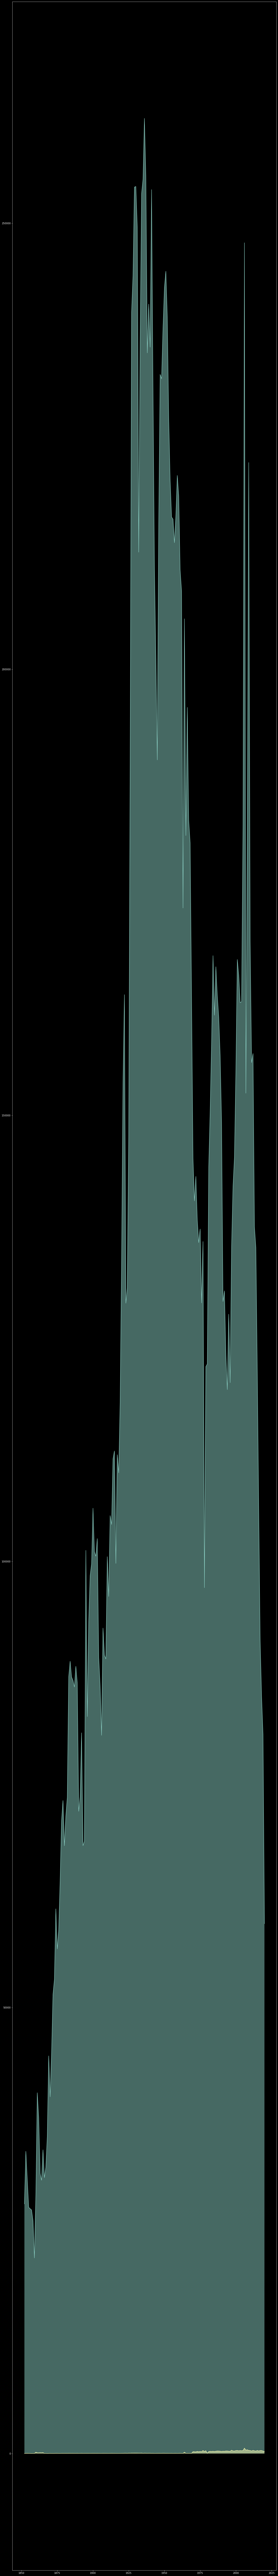

In [97]:
fig, ax = plt.subplots(figsize=(20, 200))
ax.plot(all_x, all_y)
ax.fill_between(all_x, all_y, alpha=0.5)
ax.plot(x, y)
ax.fill_between(x, y, alpha=0.5)
plt.savefig('fig.png')
plt.show()

As a percentage of articles that year.

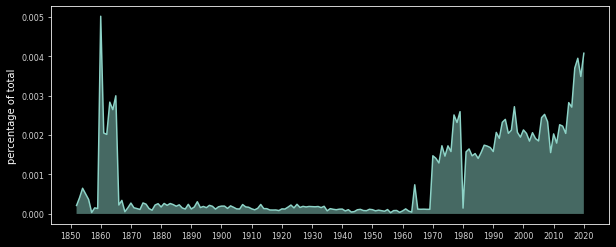

In [129]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y/all_y)
ax.fill_between(x, y/all_y, alpha=0.5)
ax.set_ylabel('percentage of total')
ax.set_xticks(np.arange(1850, max(x)+1, 10))
ax.tick_params(axis='both', colors='lightgray', labelsize=8)

Plot full dataset.

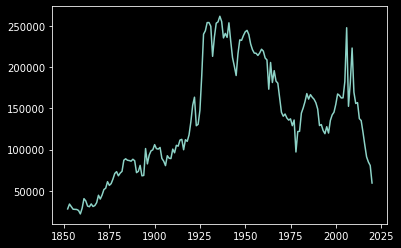

In [52]:
plt.plot(all_x, all_y)
plt.show()

In [148]:
y_norm = y/all_y
index = list(y_norm).index(max(y_norm))
start = phrase_data['date'].dt.year.min()
end = phrase_data['date'].dt.year.max()
start + index

1860

In [157]:
for url in phrase_data[phrase_data['date'].dt.year == 1860]['url']:
    print(url)

https://www.nytimes.com/1860/01/21/archives/from-albany-proceedings-of-the-legislature-the-bill-establishing-a.html
https://www.nytimes.com/1860/05/23/archives/additional-from-the-pacific-murder-of-an-express-rider-the-latest.html
https://www.nytimes.com/1860/01/04/archives/the-state-finances-report-of-the-comptroller-of-the-state-of.html
https://www.nytimes.com/1860/04/21/archives/california-arrival-of-the-pony-express-movements-of-the-japanese.html
https://www.nytimes.com/1860/11/22/archives/court-of-general-sessions-heavy-sentence-of-robbersa-woman-sent-to.html
https://www.nytimes.com/1860/05/05/archives/the-anniversaries-times-and-places-of-the-may-anniversary-meetings.html
https://www.nytimes.com/1860/03/02/archives/news-of-the-day.html
https://www.nytimes.com/1860/01/16/archives/annual-report-of-the-clerk-of-the-board-of-supervisiors-of-bills.html
https://www.nytimes.com/1860/03/02/archives/assembly.html
https://www.nytimes.com/1860/10/16/archives/departure-of-the-prince-the-sail

## Graph phrase count over the years

Define functions

In [45]:
def generate_xy(df, phrase=None):
    if phrase and phrase in df.columns: #secnod condition allows us to query and title 'all' without it looking for a column
        df = df[df[phrase]]
    years = df.groupby(df['date'].dt.year).count().reindex(list(range(1852, 2021)), fill_value=0)
    x = years.index 
    y = years['id']
    return x, y

Generate a graph for each phrase.

In [64]:
ncolors = plt.rcParams['axes.prop_cycle']
ncolors

'#8dd3c7'
'#feffb3'
'#bfbbd9'
'#fa8174'
'#81b1d2'
'#fdb462'
'#b3de69'
'#bc82bd'
'#ccebc4'
'#ffed6f'


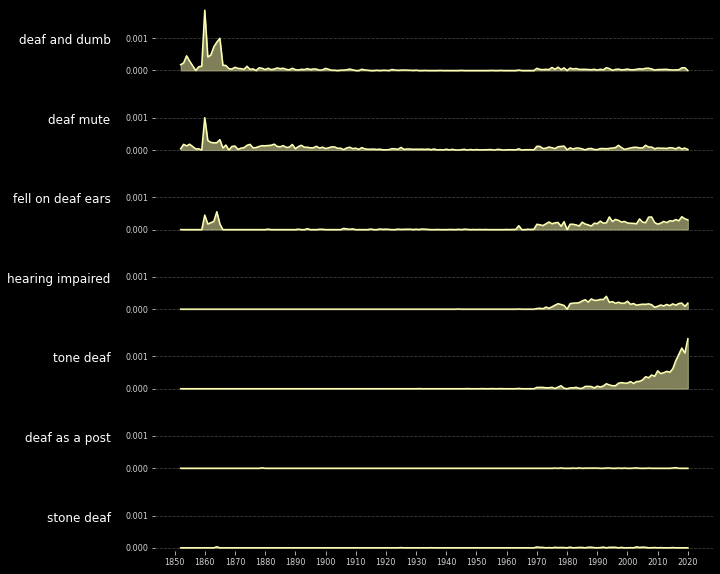

In [115]:
fig, axarr = plt.subplots(nrows=len(phrases)-1, ncols=1, figsize=(10, 10), sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0)

for i, ax in enumerate(axarr.reshape(-1)):
    ax.set_title(phrases[i].replace('_', ' '), x=-0.08, y=0.35, fontdict={'horizontalalignment': 'right'})
    x, y = generate_xy(phrase_data, phrases[i])
    ax.plot(x, y/all_y, color='#feffb3')
    ax.fill_between(x, y/all_y, alpha=0.5, color='#feffb3')
    ax.set_xticks(np.arange(1850, max(x)+1, 10))
    ax.tick_params(axis='both', colors='lightgray', labelsize=8)
    ax.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
    
    # Remove x axis
    if i != len(axarr) - 1:
        ax.xaxis.set_visible(False)
        
    # Remove frame
    for spine in ax.spines.values():
        spine.set_visible(False) 
        
plt.show()

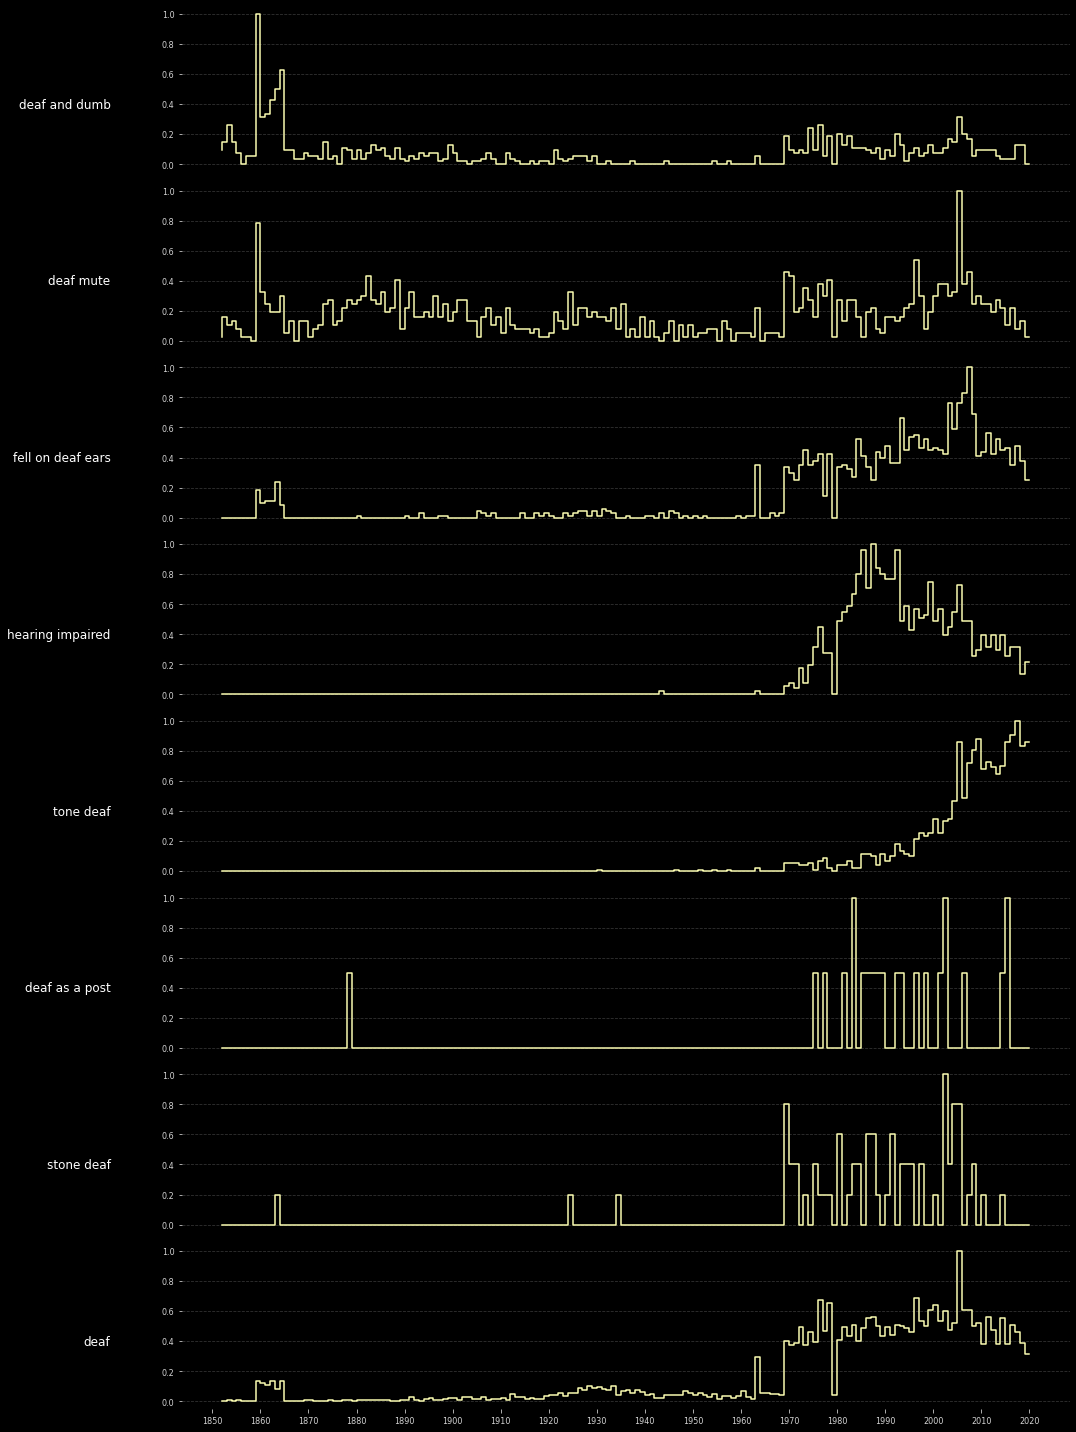

In [194]:
fig, axarr = plt.subplots(nrows=len(phrases), ncols=1, figsize=(15, 20), sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0)

for i, ax in enumerate(axarr.reshape(-1)):
    ax.set_title(phrases[i].replace('_', ' '), x=-0.08, y=0.35, fontdict={'horizontalalignment': 'right'})
    x, y = generate_xy(phrase_data, phrases[i])
    norm_y = normalize(y)
    #ax.bar(x, normalize(y), color='#feffb3')
    ax.step(x, normalize(y), color='#feffb3') # can add marker='.'
    #ax.fill_between(x, norm_y, alpha=0.5, color='#feffb3')
    ax.tick_params(axis='both', colors='lightgray', labelsize=8)
    ax.grid(axis='y', color='gray', linestyle='--', alpha=0.4)
    ax.set_yticks(np.arange(min(norm_y), max(norm_y)+0.1, 0.2))
 
    # Remove x axis
    if i != len(axarr) - 1:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(1850, max(x)+1, 10))
        
    # Remove frame
    for spine in ax.spines.values():
        spine.set_visible(False) 

plt.savefig('freqs.png', dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

I took out "deaf" from this because its y axis is much larger. It can be graphed alone.

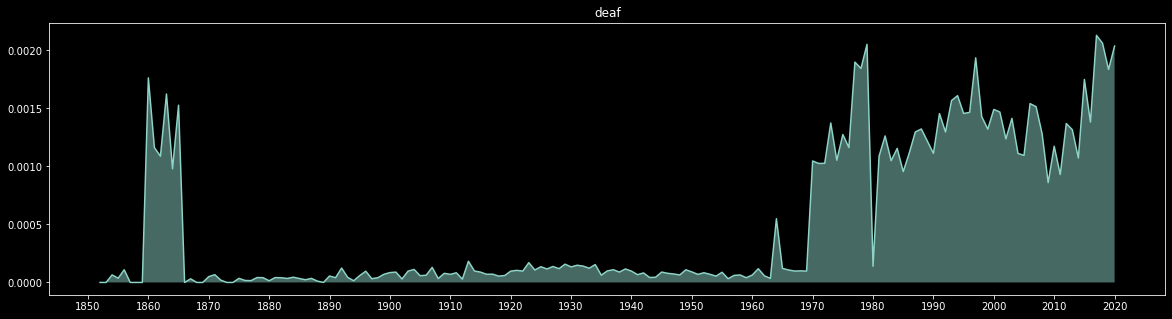

In [118]:
phrase = phrases[-1]
x, y = generate_xy(phrase_data, phrase)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y/all_y)
plt.fill_between(x, y/all_y, alpha=0.5)
plt.title(phrase)
plt.xticks(np.arange(1850, max(x)+1, 10))
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

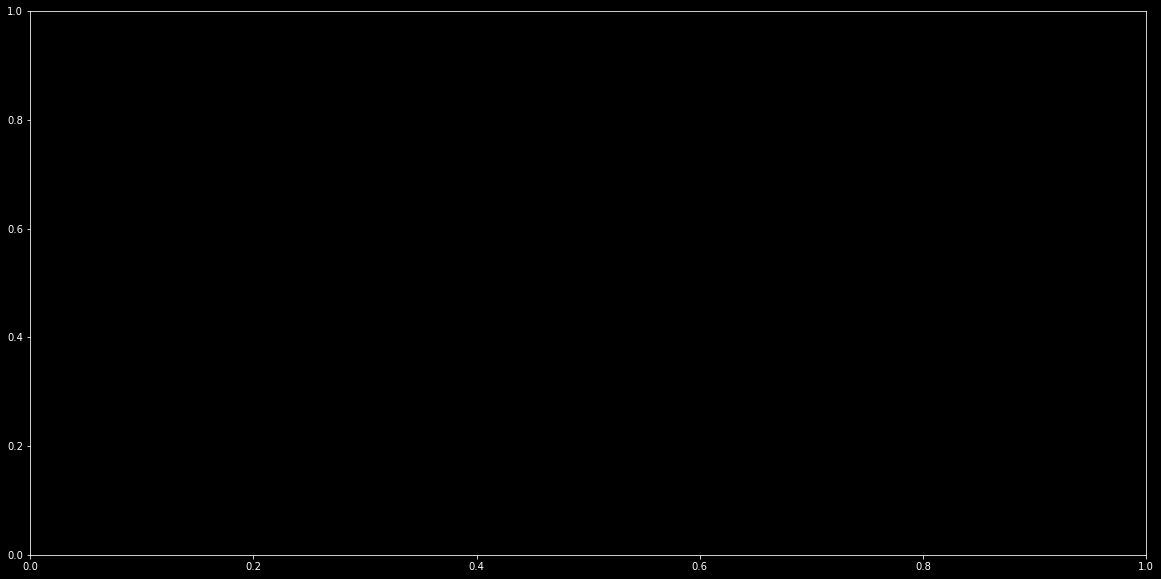

In [258]:
# Not very good representation of the data
plt.figure(figsize=(20, 10))

stacked_y = []
for phrase in phrases:
    x, y = generate_xy(phrase_data, phrase)
    stacked_y.append(y/all_y)
    
plt.stackplot(x, stacked_y, alpha=0.7)
plt.xticks(np.arange(1850, max(x)+1, 10))
plt.title('all phrases')
plt.ylabel('% of total')
plt.legend(phrases, loc='upper center')
plt.show()

need to get how many articles each year are in phrase_data
https://twitter.com/aleszubajak/status/1194233155642941440

In [285]:
def normalize(x):
    return (x - min(x)) / (max(x) - min(x))

## Keywords

### Most common keywords

Show how many keywords are missing.

Graph plots horizontal lines OVER the bars?

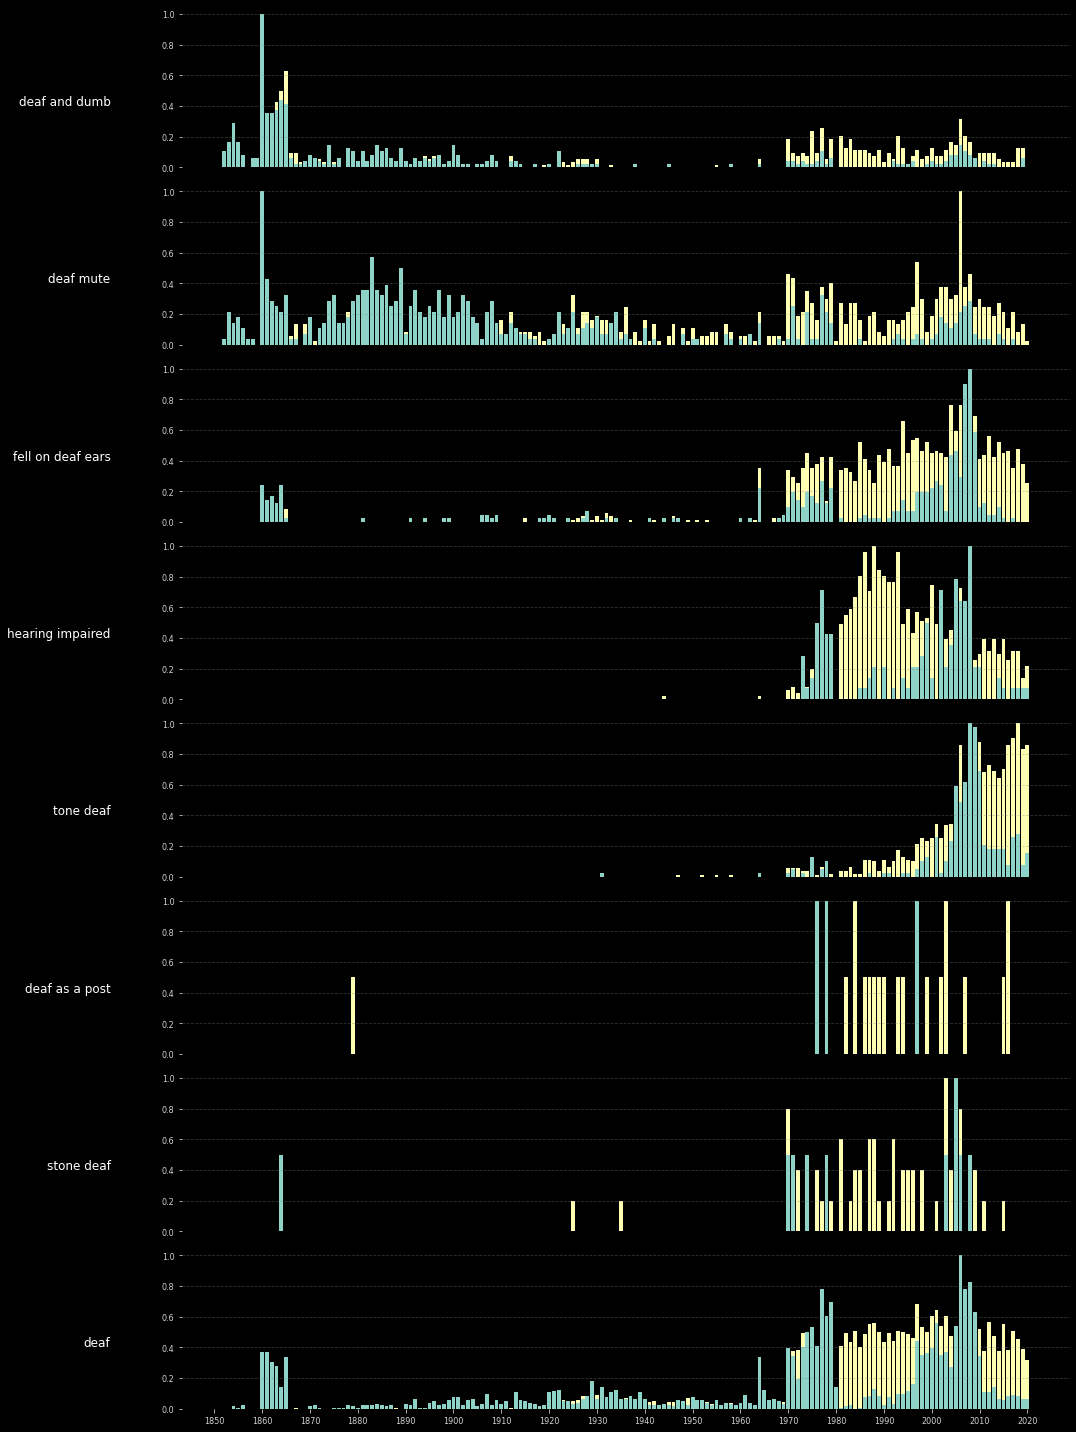

In [301]:
articles_missing_keywords = phrase_data[~phrase_data['keywords'].apply(lambda x: len(x) > 0)]

fig, axarr = plt.subplots(nrows=len(phrases), ncols=1, figsize=(15, 20), sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0)

for i, ax in enumerate(axarr.reshape(-1)):
    ax.set_title(phrases[i].replace('_', ' '), x=-0.08, y=0.35, fontdict={'horizontalalignment': 'right'})
    x, y_missing = generate_xy(articles_missing_keywords[articles_missing_keywords[phrases[i]]])
    _, y_phrase = generate_xy(phrase_data[phrase_data[phrases[i]]])
    #x, y = generate_xy(phrase_data, phrases[i])
    norm_y_missing = normalize(y_missing)
    norm_y_phrase = normalize(y_phrase)
    #ax.fill_between(x, norm_y, alpha=0.5, color='#feffb3')
    ax.tick_params(axis='both', colors='lightgray', labelsize=8)
    ax.grid(axis='y', color='gray', linestyle='--', alpha=0.4)
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    
    # Remove x axis
    if i != len(axarr) - 1:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(1850, max(x)+1, 10))
        
    # Remove frame
    for spine in ax.spines.values():
        spine.set_visible(False) 
    
    # Plot
    ax.bar(x, norm_y_phrase, color='#feffb3') 
    ax.bar(x, norm_y_missing)

plt.savefig('figs/keywords_missing.png', dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

Get top keywords for each phrase.

In [220]:
def get_top_keywords(df):
    counts = pd.Series(x for l in df['keywords'] for x in l).value_counts(ascending=False)
    return counts

In [305]:
for phrase in phrases:
    print('\n-----Phrase: ' + phrase + '-----')
    keywords = get_top_keywords(phrase_data[phrase_data[phrase]])
    if 'TERMS NOT AVAILABLE' in keywords:
        del keywords['TERMS NOT AVAILABLE']
    if 'Reviews' in keywords:
        del keywords['Reviews']
    if 'NO INDEX TERMS' in keywords:
        del keywords['NO INDEX TERMS']
    print(keywords.head(20))


-----Phrase: deaf_and_dumb-----
MISCELLANEOUS                                     29
Theater                                           27
Books and Literature                              24
BOOK REVIEWS                                      22
MOTION PICTURES                                   22
Music                                             13
REVIEWS AND OTHER DATA ON SPECIFIC PRODUCTIONS    12
Politics and Government                           12
Deafness                                          12
ACCIDENTS                                          9
Art                                                8
WAR                                                8
Opera                                              7
Television                                         7
Children and Youth                                 7
Murders and Attempted Murders                      7
Editorials                                         7
TITLE INDEX                                        6
Writing and W

### Whether the articles are actually about the deaf

In [82]:
print('Total keywords: ' + str(len(keywords)))

Total keywords: 764


In [129]:
deaf_keywords = [x for x in keywords.keys() if 'sign language' in x.lower()
                                                  or 'ears and hearing' in x.lower() 
                                                  or 'hearing aid' in x.lower()
                                                  or 'special education' in x.lower() #?
                                                  or 'specialeducation' in x.lower() #? 
                                                  or 'deaf' in x.lower()
                                                  or 'cochlear' in x.lower()
                                                  or 'language and languages' in x.lower()
                                                  or 'culture' in x.lower()
                                                  or 'handicapped' in x.lower() and 'socially' not in x.lower()
                                                  or ('disability' in x.lower() or 'disabilities' in x.lower()) and 'mental' not in x.lower()]

deaf_keywords

['Deafness',
 'Handicapped',
 'Ears and Hearing',
 'Hearing Aids',
 'Sign Language',
 'Disabilities',
 'DEAFNESS AND DEAF-MUTES',
 'Culture',
 'Language and Languages',
 'Special Education (Handicapped)',
 'DEAFNESS AND DEAF‐MUTES',
 'Special Education',
 'AMERICANS WITH DISABILITIES ACT',
 'Cochlear Implants',
 'SPECIAL EDUCATION (FOR THE BLIND, HANDICAPPED, ETC)',
 'Learning Disabilities',
 'Disability Insurance',
 'AGRICULTURE',
 'HEARING AID COMPATIBILITY ACT OF 1988',
 'AMERICANS WITH DISABILITIES ACT (1991)',
 'AMERICANS WITH DISABILITIES ACT OF 1990',
 'Nicaraguan Sign Language']

In [132]:
deaf_articles = phrase_data[phrase_data['keywords'].apply(lambda x: any(y in x for y in deaf_keywords))].sort_values('date', ascending=True)
deaf_articles

,headline,date,doc_type,material_type,news_desk,section,keywords,url,id,byline,deaf_and_dumb,deaf_mute,fell_on_deaf_ears,hearing_impaired,tone_deaf,deaf_as_a_post,stone_deaf,deaf
6194,PROCEEDINGS OF CONGRESS.; SENATE.,1860-03-23,article,Archives,None,Archives,[AGRICULTURE],https://www.nytimes.com/1860/03/23/archives/pr...,nyt://article/865a08e2-5225-5b88-bbe8-e745be9c...,NaN,False,False,False,False,False,False,False,True
6000,GLEANINGS FROM THE MAILS; DEAF AS A POST. DISA...,1879-05-13,article,Archives,None,Archives,[Deafness],https://www.nytimes.com/1879/05/13/archives/gl...,nyt://article/a047ac7f-cd2b-5ca1-87b7-83c5b56d...,NaN,False,False,False,False,False,True,False,False
6386,GOOD NEWS FOR THE DEAF.,1888-09-09,article,Archives,None,Archives,[Deafness],https://www.nytimes.com/1888/09/09/archives/go...,nyt://article/b345e77a-562c-5eeb-be09-0dcce6da...,NaN,False,False,False,False,False,False,False,True
6400,NEW REMEDY FOR DEAFNESS.; DR. LEECH BELIEVES T...,1892-05-23,article,Archives,None,Archives,[Deafness],https://www.nytimes.com/1892/05/23/archives/ne...,nyt://article/6aec4ce8-28d5-5b69-838d-a8118b28...,NaN,False,False,False,False,False,False,False,True
6401,HOMEOPATHISTS COMPARE NOTES.; SUCCESSFUL EXPER...,1892-06-15,article,Archives,None,Archives,[Deafness],https://www.nytimes.com/1892/06/15/archives/ho...,nyt://article/74eab4b2-f75d-5799-bb6b-f87bbc12...,NaN,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16791,Lawsuit Demands Sign Language at White House V...,2020-08-04,article,News,Express,U.S.,"[Coronavirus (2019-nCoV), Deafness, Sign Langu...",https://www.nytimes.com/2020/08/04/us/politics...,nyt://article/3cb3f850-82fb-54b0-91ff-9e8d8ec6...,By Aimee Ortiz,False,False,False,False,False,False,False,True
5015,Democratic Convention: Best and Worst Moments ...,2020-08-21,article,Op-Ed,OpEd,Opinion,"[Presidential Election of 2020, United States ...",https://www.nytimes.com/2020/08/21/opinion/dem...,nyt://article/6fd075a5-e2e7-5eb1-bd92-875f25d8...,By The New York Times Opinion,False,False,False,False,True,False,False,False
16807,Getting Your Kids to Turn It Down a Notch (or ...,2020-08-24,article,News,Parenting,Parenting,"[Noise, Ears and Hearing, Children and Childho...",https://www.nytimes.com/2020/08/24/parenting/c...,nyt://article/5e6a298b-99b5-5a64-9a4a-26731278...,By Jill Waldbieser,False,False,False,False,False,False,False,True
16819,The Actors With Disabilities Redefining Repres...,2020-08-25,article,News,TStyle,T Magazine,"[Disabilities, ACTORS AND ACTRESSES]",https://www.nytimes.com/2020/08/25/t-magazine/...,nyt://article/9069205d-f220-5be6-93f4-7f20a3ab...,By Mark Harris,False,False,False,False,False,False,False,True


In [138]:
for i in deaf_articles['keywords']:
    print(i)

['AGRICULTURE']
['Deafness']
['Deafness']
['Deafness']
['Deafness']
['Deafness']
['Deafness']
['Deafness', 'BLINDNESS AND THE BLIND']
['Deafness']
['Deafness']
['Deafness', 'SYNAGOGUES AND JEWISH CENTERS']
['Deafness']
['Deafness']
['Deafness']
['Deafness']
['Deafness']
['Deafness']
['Deafness', 'Crime and Criminals']
['Deafness']
['RADIUM', 'USES', 'Deafness']
['RADIUM', 'USES', 'Deafness']
['RADIUM', 'USES', 'Deafness']
['Deafness']
['Deafness']
['Deafness']
['SPANISH PRINCE', 'Deafness']
['MODELS', 'Deafness']
['AERONAUTICS', 'Deafness', 'Deafness']
['Deafness']
['Deafness']
['Deafness']
['Deafness']
['PARLIAMENT', 'Deafness', 'SOUND AMPLIFIERS']
['PROHIBITION', 'Radio', 'Deafness']
['Deafness']
['Deafness', 'ACCIDENTS', 'AERONAUTICS']
['Deafness']
['Deafness']
['Deafness']
['Education', 'Deafness']
['Deafness']
['Radio', 'Deafness', 'Deafness']
['Deafness']
['Deafness', 'OSCILLOSCOPE (OSISO)']
['Deafness', 'OSCILLOGRAPH']
['Deafness']
['Deafness']
['Deafness']
['Deafness']
['Deafne

['Reviews', 'Books and Literature', 'Language and Languages']
['Deafness', 'Colleges and Universities', 'Sign Language']
['Sign Language', 'Deafness', 'Colleges and Universities']
['Dogs', 'Computer and Video Games', 'Prices (Fares, Fees and Rates)', 'Breeding of Animals', 'Women', 'Culture', 'Pets', 'Defective Products', 'Color', 'Computers and the Internet', 'Cameras', 'Education and Schools', 'Genetics and Heredity', 'Fads', 'Cruelty to Animals', 'Photography']
['Deafness', 'Theater']
['Classical Music', 'Ears and Hearing']
['Handicapped', 'Subways']
['Deafness', 'Colleges and Universities']
['Sign Language', 'French Language', 'Theater', 'Language and Languages', 'Deafness']
['ANIMALS', 'Dogs', 'Deafness']
['Deafness', 'Asian-Americans', 'IMMIGRATION AND REFUGEES', 'Dancing']
['Rap Music', 'Deafness', 'Sign Language']
['Theater', 'Deafness', 'Sign Language']
['Tests and Testing', 'Birth Control and Family Planning', 'Children and Youth', 'Pregnancy and Obstetrics', 'Women', 'Birth 

['Nobel Prizes', 'Chemistry', 'Deaths (Obituaries)', 'Deafness']
['Bluetooth Wireless Technology', 'Hearing Aids', 'Wireless Communications']
['Deafness', 'Disabilities', 'Real Estate and Housing (Residential)']
['Football', 'Deafness', 'Super Bowl', 'Colleges and Universities', 'Football (College)']
['Classical Music', 'Deafness', 'Ghostwriting', 'Music', 'Frauds and Swindling']
['Theater', 'Posters', 'Sign Language', 'Design']
['Classical Music', 'Deafness', 'Frauds and Swindling', 'Music']
['Children and Childhood', 'Deafness', 'Education (Pre-School)', 'Parenting', 'Poverty', 'Medicine and Health']
['Noise', 'Workplace Environment', 'Ears and Hearing']
['Babies and Infants', 'Sleep', 'Ears and Hearing', 'Parenting']
['Deafness', 'Hoaxes and Pranks', 'Frauds and Swindling', 'Classical Music', 'Music']
['Libraries and Librarians', 'Deafness', 'Sign Language']
['Deafness', 'Hearing Aids', 'Ears and Hearing', 'Children and Childhood', 'Books and Literature', 'Language and Languages']
[

In [159]:
for i in phrase_data.drop(deaf_articles.index)['keywords']:
    print(i)

[]
[]
['Homeless Persons', 'HOTELS AND MOTELS', 'Children and Youth', 'Mental Health and Disorders']
['Company Reports']
['Space and Astronomy', 'United States Defense and Military Forces', 'Satellites', 'United States Politics and Government']
[]
[]
[]
['Books and Literature']
['Relocation of Business', 'Tax Deductions', 'Science and Technology']
[]
[]
['STAMPS COVERS AND CACHETS (POSTAL)']
[]
['MOTION PICTURES', 'Reviews']
[]
['Books and Literature']
['Theater']
['TERMS NOT AVAILABLE']
['Music', 'DISCOTHEQUES']
['MISCELLANEOUS', 'JEWS']
[]
['Cafeterias', 'JEWS', 'Surveys and Series', 'Restaurants']
['MOTION PICTURES', 'REVIEWS AND OTHER DATA ON SPECIFIC PRODUCTIONS']
[]
['Reviews', 'TELEVISION PROGRAMS', 'Television']
['Politics and Government']
[]
['WAR']
['Books and Literature']
['WAR']
['Politics and Government', 'Prisons and Prisoners']
[]
['Art', 'DEATHS']
['COCAINE', 'UNITED STATES ARMAMENT AND DEFENSE', 'Drug Abuse and Traffic']
[]
['Postal Service', 'Indians, American']
['AIR

[]
['Movies', 'Halloween']
['SHOOTINGS', 'WRESTUNG']
[]
[]
[]
[]
['MISCELLANEOUS']
['Movies']
[]
['BOOK REVIEWS']
[]
['TERMS NOT AVAILABLE']
['MISCELLANEOUS', 'MISCELLANEOUS', 'MISCELLANEOUS', 'MISCELLANEOUS', 'MISCELLANEOUS']
[]
[]
[]
['Music', 'Biographical Information']
[]
['Reviews', 'Theater']
['Reviews', 'ART SHOWS', 'Art']
[]
['MOTION PICTURES', 'PERSONNEL', 'MOTION PICTURES', 'Festivals', 'MOTION PICTURES', 'REVIEWS AND OTHER DATA ON SPECIFIC PRODUCTIONS']
[]
[]
[]
[]
['Immigration', 'DEFECTIVES']
['Terrorism', 'Sufism (Religion)']
[]
[]
[]
['TELEVISION PROGRAMS', 'Television', 'ACTORS AND ACTRESSES', 'Biographical Information']
['MOTION PICTURES']
[]
[]
['MOTION PICTURES', 'Children and Youth']
[]
[]
['MOTION PICTURES']
['MOTION PICTURES']
['BOOK REVIEWS']
[]
[]
[]
[]
[]
['Assaults', 'Sex Crimes']
[]
[]
['MISCELLANEOUS', 'MISCELLANEOUS', 'FIRE']
['Historic Buildings and Sites']
['Police']
[]
[]
['TRIALS', 'Libel and Slander']
['Crime and Criminals']
['Books and Literature']
[]

['TELEPHONES', 'RATES']
['ADVERTISING', 'Television', 'RETAIL STORES AND TRADE', 'Computers and the Internet']
['Politics and Government']
['COMMUNICATIONS SATELLITES', 'SATCOM III (COMMUNICATIONS SATELLITE)']
[]
[]
['United States International Relations', 'War Crimes, Genocide and Crimes Against Humanity', 'Prisoners of War', 'Photography', 'Terrorism', 'UNITED STATES ARMAMENT AND DEFENSE']
[]
['Ethics', 'Doctors', 'Law and Legislation', 'Medicine and Health', 'Regulation and Deregulation of Industry', 'RATES']
[]
['CONGRESS']
[]
['Prisons and Prisoners', 'Torture']
['Education and Schools', 'Law and Legislation', 'SCHOOL ADMINISTRATION AND COMMUNITY ROLE']
['Real Estate and Housing (Residential)', 'Smoking and Tobacco', 'Noise', 'Newspapers', 'Robberies and Thefts']
[]
['ECONOMIC CONDITIONS AND TRENDS (GENERAL)', 'Economic Conditions and Trends']
['Grammy Awards', 'Rap and Hip-Hop', 'Pop and Rock Music']
['Civil War and Guerrilla Warfare', 'REFUGEES AND EXPATRIATES']
['Comedy and Hu

['Social Conditions and Trends', 'BLACKS (IN US)']
[]
['Education and Schools', 'Finances', 'Education and Schools', 'SCHOOL ADMINISTRATION AND COMMUNITY ROLE']
['ILLEGAL ALIENS', 'REFORM ANDREORGANIZATION', 'Deportation', 'Surveys and Series', 'IMMIGRATION AND REFUGEES', 'Crime and Criminals']
[]
[]
['Spanish Civil War (1936-39)', 'Politics and Government']
['Fashion and Apparel', 'Television', 'Costumes']
['Vietnam War', 'ARLINGTON NATIONAL CEMETERY']
['LABOR', 'Shutdowns (Institutional)', 'LAYOFFS (LABOR)', 'TELEPHONES']
['Civil War (US) (1861-65)', 'Sentences (Criminal)']
["Father's Day", 'Children and Youth', 'BEHAVIOR AND TRAINING', 'Sex']
['Futures and Options Trading', 'Financial Brokers', 'Oil (Petroleum) and Gasoline', 'Stocks and Bonds', 'Regulation and Deregulation of Industry']
['Text Messaging', 'Demonstrations, Protests, and Riots', 'Android (Operating System)', 'Police', 'Mobile Applications']
['Government Bonds', 'Education and Schools', 'Equal Educational Opportunitie

['Books and Literature']
['Art']
['United States International Relations']
['Speeches and Statements', 'Nobel Prizes']
['United States Economy', 'Super Bowl', 'ADVERTISING AND MARKETING', 'Television']
['Automobiles']
['Gifts', 'Interior Design and Furnishings', 'Shopping and Retail', 'Hanukkah', 'Customs, Etiquette and Manners', 'Christmas']
['Social Media', 'Customer Relations']
['Banks and Banking', 'Glass-Steagall Act (1933)', 'Regulation and Deregulation of Industry', 'Subprime Mortgage Crisis']
['Suicides and Suicide Attempts', 'Colleges and Universities', 'Depression (Mental)', 'Parenting']
['Books and Literature', 'Writing and Writers']
['Presidential Election of 2016', 'Women and Girls', 'Debates (Political)']
['Books and Literature']
['#MeToo Movement', 'Comedy and Humor', 'Sexual Harassment', 'Women and Girls', 'Demonstrations, Protests and Riots']
['Oil (Petroleum) and Gasoline']
['World Trade Center (NYC)', 'AIRLINES AND AIRPLANES', 'Hijacking', 'Security and Warning Syste

[]
[]
['Presidents and Presidency (US)', 'United States Politics and Government', 'Biographical Information']
['Women and Girls', "Women's Rights", '#MeToo Movement', 'Demonstrations, Protests and Riots', 'Murders, Attempted Murders and Homicides', 'Sexual Harassment']
[]
['Sandwiches', 'Gentrification', 'Restaurants', 'Delicatessens', 'Diet and Nutrition']
['Computer and Video Games', 'Mobile Applications']
[]
[]
['ARCHITECTURE', 'United States Politics and Government']
['Hockey, Ice', 'Hockey, Ice']
['Books and Literature']
[]
['Biographical Information', 'Presidential Election of 1992']
['BUSINESS IMPROVEMENT DISTRICTS', 'Economic Conditions and Trends']
['Television']
['Birth Control and Family Planning', 'Midterm Elections (2014)', 'Women and Girls', 'United States Politics and Government', 'Elections, Senate']
['Presidential Election of 2000']
['Pop and Rock Music', 'Royalties', 'Private Equity', 'Social Media', 'Audio Recordings, Downloads and Streaming', 'Copyrights and Copyrig

['LABOR UNIONS', 'LABOR UNIONS', 'JURISDICTIONAL DISPUTES']
[]
[]
['DROUGHT RELIEF', 'DROUGHTS', 'DROUGHTS']
['AGRICULTURAL EDUC', 'DEAFNESS AND DEAF MUTES']
['MAN, FUTURE', 'Noise', 'EFFECTS']
[]
[]
['Pianos', 'Musical Instruments']
['ARCHITECTURE', 'PRIZES AND CONTESTS', 'DROUGHTS']
['Courts', 'Witnesses', 'DEAFNESS AND DEAF MUTES']
[]
['DEAFNESS AND DEAF MUTES']
['DISPATCHES', 'FOREIGN RELATIONS', 'EUROPEAN WAR', 'PEACE TREATY WITH GERMANY (VERSAILLES TREATY)']
[]
[]
[]
[]
[]
['DEAFNESS AND DEAF MUTES']
[]
['FIRES']
[]
[]
['JEWS']
['MOTION PICTURES']
[]
['BLINDNESS AND THE BLIND']
['HEALTH']
['PEACE AND WAR']
['DEATHS AND DEATH RATE']
['Football', 'INTERSCHOLASTIC']
[]
[]
['Noise']
[]
['DEAFNESS AND DEAF MUTES']
['JEWS', 'Immigration and Emigration', 'Politics and Government', 'Politics and Government', 'FOREIGN RELATIONS']
['Eyes and Eyesight', 'DEAFNESS AND DEAF MUTES', 'QUININE', 'SALICYLATES', 'ALCOHOL', 'Blood Vessels', 'BIRTHS']
['DEAFNESS AND DEAF MUTES']
[]
[]
[]
[]
['DEAFNE

['OCEANS AND OCEANOGRAPHY', 'COMMERCE', 'Colleges and Universities', 'STUDENT ACTIVITIES AND CONDUCT', 'Colleges and Universities', 'SHOES, BOOTS AND RUBBERS', 'News and News Media', 'News and News Media', 'News and News Media', 'GENERAL POLICIES OF BELLIGERENTS, OTHER MAJOR POWERS', 'Politics and Government', 'Politics and Government', 'Politics and Government', 'NIXON ADMINISTRATION', 'Politics and Government', 'Politics and Government', 'Law and Legislation', 'Automobiles', 'EXPORTS AND IMPORTS', 'Medicine and Health', 'Metals and Minerals', 'Taxation', 'FEDERAL', 'Income Tax', 'Taxation', 'FEDERAL', 'Bankruptcies', 'ISRAELI-ARAB CONFLICT', 'JL 16 PAR']
[]
['Music', 'ORCHESTRAS AND OTHER MUSIC GROUPS']
['Murders and Attempted Murders', 'Murders and Attempted Murders', 'Murders and Attempted Murders', 'AIRPLANES', 'Accidents and Safety']
['SOCIAL CONDITIONS AND WELFARE', 'BOOK REVIEWS']
['DEATHS']
['Elections']
['Finances', 'BUDGET']
['DEATHS']
['Economic Conditions and Trends']
['DE

['Music', 'ACOUSTICS', 'Theater']
['Sex Crimes', 'Law and Legislation']
['BOOK REVIEWS', 'Books and Literature']
['STATIONS AND NETWORKS', 'COMMUNICATIONS', 'Television', 'Regulation and Deregulation of Industry', 'ELECTRONIC INFORMATION SYSTEMS']
['NO INDEX TERMS']
['Dancing']
['Theater']
['Theater']
['MOTION PICTURES', 'Reviews']
['Summit Conferences', 'Economic Conditions and Trends', 'United States Economy', 'International Relations', 'United States International Relations']
['Theater']
['Marriages', 'Women', 'Women', 'Feminist Movement']
['ANTIQUES']
['TERMS NOT AVAILABLE']
['Mergers, Acquisitions and Divestitures', 'TELEPHONES', 'DATA PROCESSING']
['TERMS NOT AVAILABLE']
['Robberies and Thefts', 'Murders and Attempted Murders', 'TRIALS', 'Jury System']
['TERMS NOT AVAILABLE']
['Heroin', 'Pain-Relieving Drugs', 'Law and Legislation']
['Taxation', 'Politics and Government', 'UNITED STATE INTERNATIONAL RELATIONS', 'Foreign Service']
['TERMS NOT AVAILABLE']
['Festivals', 'Music', 'Re

['Baseball', 'Surveys and Series', 'Coaches and Managers', 'BLACKS (IN US)', 'Discrimination', 'MINORITIES (ETHNIC, RACIAL, RELIGIOUS)', 'Athletics and Sports']
['RECORDINGS (VIDEO)', 'Biology and Biochemistry', 'Reviews', 'CASSETTES']
['Weddings and Engagements']
['Dogs', 'Suits and Litigation', 'DAMAGE SUITS']
['POLITICS AND GOVERNMENT (1983)', 'Economic Conditions and Trends']
['Astrology', 'Occult Sciences']
['TERMS NOT AVAILABLE']
['OCEAN VOYAGES']
['Blindness', 'Theater']
['ART SHOWS', 'Art', 'Blindness']
['STORY-TELLING']
['Music']
['JEWS', 'HEROISM AND HEROES', 'DISCLOSURE OF INFORMATION', 'NAZI ERA']
['Social Conditions and Trends', 'LIFE STYLES', 'Rural Areas', 'Commuting']
['Festivals', 'Reviews', 'Dancing']
['Credit', 'BOND PRICES AND TRADING VOLUME', 'Government Bonds']
['Social Conditions and Trends', 'LIFE STYLES']
['Weddings and Engagements']
['Television', 'Biographical Information']
['TERMS NOT AVAILABLE']
['DEGREES, ACADEMIC', 'Awards, Decorations and Honors']
[]
['R

['Dogs', 'Breeding of Animals', 'Genetic Engineering']
['Weddings and Engagements']
['RECORDINGS (VIDEO)', 'Men', 'INTERNET AND WORLD WIDE WEB', 'COMPUTERS ANDINFORMATION SYSTEMS', 'Research']
['Politics and Government', 'Elections']
['Reviews', 'Television']
['ATOMIC WEAPONS', 'Social Conditions and Trends', 'International Relations', 'GEOGRAPHIC PROFILES', 'Politics and Government', 'Famine']
[]
['DOG SHOWS', 'SHOWS (EXHIBITS)']
['QUOTATION OF THE DAY']
['Books and Literature']
[]
['Reviews', 'Art']
['Genetics and Heredity', 'Discrimination', 'Research']
[]
['Biographical Information', 'Opera']
['Music', 'Dancing']
[]
['Finances', 'Budgets and Budgeting', "Workers' Compensation Insurance"]
['Finances', 'Politics and Government', 'Law and Legislation', 'Budgets and Budgeting']
['Mortgages', 'Malpractice', 'Suits and Litigation', 'CLASS-ACTION SUITS', 'Legal Profession']
['NEWS PHOTOGRAPHY', 'Photography']
['Probation and Parole', 'Prisons and Prisoners', 'AGED']
[]
['GEOGRAPHIC PROFIL

['Biographical Information', 'Presidential Election of 2000']
[]
[]
['NEW YORK TIMES NEEDIEST CASES FUND']
['MOTION PICTURES', 'Reviews']
['Books and Literature']
[]
['Subways', 'Taxicabs and Taxicab Drivers', 'Trucks and Trucking', 'FIRES AND FIREMEN', 'Transit Systems', 'Noise', 'AMBULANCES', 'Police']
['United States Politics and Government', 'Minorities (US)', 'Blacks', 'Black People', 'Presidential Election of 2000']
['Cellular Telephones', 'Medicine and Health']
['Indians, American', 'Minorities (US)', 'Blacks', 'Black People', 'Beatifications and Canonizations']
['United States International Relations', 'Mental Health and Disorders', 'Terrorism', 'UNITED STATES ARMAMENT AND DEFENSE']
['Music', 'UNITED STATES FOREIGN SERVICE', 'Stations and Terminals (Passenger)', 'RECORDINGS (AUDIO)']
['Theater']
['Reviews', 'Books and Literature']
[]
[]
['Taxation', 'Property Taxes', 'Blacks', 'Black People']
['Reviews', 'Television']
['States (US)', 'Medicine and Health']
['NEW YORK TIMES NEED

['Fertility Drugs', 'In Vitro Fertilization', 'Multiple Births', 'Health Insurance and Managed Care', 'Pregnancy and Obstetrics', 'ARTIFICIAL INSEMINATION', 'Reproduction (Biological)']
[]
['Baseball', 'Art']
[]
[]
[]
['Books and Literature']
['Books and Literature']
['Recipes', 'Bakeries and Baked Products', 'Cakes', 'Food', 'Travel and Vacations', 'Spices', 'Dating (Social)', 'Cooking and Cookbooks', 'Desserts']
['War Crimes, Genocide and Crimes Against Humanity', 'Economic Conditions and Trends', 'Oil (Petroleum) and Gasoline', 'Embargoes and Economic Sanctions']
['ELECTION ISSUES', 'Families and Family Life']
['Gifts', 'Autism', 'Toys']
['Art', 'Museums']
['Dating (Social)', 'Social Networking (Internet)']
[]
[]
['Dialysis', 'Philanthropy', 'Kidneys']
['MOTION PICTURES']
['Travel and Vacations']
[]
['Reviews', 'Television', 'Women']
[]
[]
['Hiring and Promotion']
[]
['Families and Family Life', 'Friendship', 'Wireless Communications', 'Cellular Telephones', 'Computers and the Inter

['Cameras', 'Computers and the Internet', 'Photography']
[]
['Murders and Attempted Murders', 'Decisions and Verdicts']
['Education', 'General Educational Development Test (GED)', 'Philanthropy']
['Parties (Social)', 'Books and Literature', 'Art']
['Music']
['Awards, Decorations and Honors', 'Books and Literature']
['Travel and Vacations']
['Theater']
['Sex Crimes', 'Priests', 'Child Abuse and Neglect']
['Travel and Vacations', 'Real Estate and Housing (Residential)', 'Friendship']
['Aurora, Colo, Shooting (2012)', 'Law and Legislation', 'Gun Control', 'Second Amendment (US Constitution)']
['Accidents and Safety', 'Death and Dying', 'Factories and Manufacturing', 'Families and Family Life', 'Fires and Firefighters', 'Immigration and Emigration', 'Labor and Jobs']
['Books and Literature']
['Newspapers', 'Social Networking (Internet)', 'News Sources, Confidential Status of', 'News and News Media']
['Books and Literature']
['Sex Crimes', 'Child Abuse and Neglect']
['Books and Literature']

['ACTORS AND ACTRESSES', 'Transgender and Transsexuals', 'Television', 'Men and Boys', 'Gender']
['Bars and Nightclubs', 'Art']
['Art', 'Museums', 'Conflicts of Interest', 'Whistle-Blowers', 'Black People', 'Blacks', 'Discrimination', 'Workplace Hazards and Violations']
[]
[]
['Dogs']
['Books and Literature', 'Poetry and Poets', 'Writing and Writers']
['Classical Music']
['Weddings and Engagements']
['Theater', 'ACTORS AND ACTRESSES']
["Women's Rights", 'Politics and Government', 'Women and Girls', '#MeToo Movement', 'Black People', 'Blacks', 'Sexual Harassment', 'Sex Crimes', 'Child Abuse and Neglect']
['Deaths (Obituaries)', 'Dancing', 'Drums', 'Pop and Rock Music', 'Rap and Hip-Hop']
['Books and Literature']
['Movies']
['Books and Literature', 'Writing and Writers']
['Tennis', 'United States Open (Tennis)']
['George Floyd Protests (2020)', 'Police Brutality, Misconduct and Shootings', 'Emergency Medical Treatment', 'Deaths (Fatalities)', 'Tear Gas', 'your-feed-healthcare']
['Coronav

## First & last articles for each phrase

In [13]:
for phrase in phrases:
    print('\nPhrase: ' + phrase)
    print('-----FIRST ARTICLE-----')
    phrase_subset = phrase_data[phrase_data[phrase]].sort_values('date', ascending=True)
    first_article = phrase_subset.iloc[0]
    print('Date: ' + str(first_article['date']))
    print('Headline: ' + first_article['headline'])
    
    print('-----LAST ARTICLE-----')
    last_article = phrase_subset.iloc[-1]
    print('Date: ' + str(last_article['date']))
    print('Headline: ' + last_article['headline'])


Phrase: deaf_and_dumb
-----FIRST ARTICLE-----
Date: 1852-05-14 00:00:00
Headline: Institution for the Deaf and Dumb.
-----LAST ARTICLE-----
Date: 2019-12-12 00:00:00
Headline: How ‘Survivor’ Failed Its #MeToo Test

Phrase: deaf_mute
-----FIRST ARTICLE-----
Date: 1852-09-29 00:00:00
Headline: DEAF MUTES.; The Statistics of the Class.
-----LAST ARTICLE-----
Date: 2020-01-16 00:00:00
Headline: Lorenza Mazzetti, Wartime Survivor and Seminal Filmmaker, Dies at 92

Phrase: fell_on_deaf_ears
-----FIRST ARTICLE-----
Date: 1860-01-13 00:00:00
Headline: Execution of Patrick Maude.; REMARKABLE SPEECH OF THE CRIMINAL UPON THE GALLOWS.
-----LAST ARTICLE-----
Date: 2020-09-08 00:00:00
Headline: As a University Spokesman, Can I Promote a Reopening Plan I Question?

Phrase: hearing_impaired
-----FIRST ARTICLE-----
Date: 1944-12-24 00:00:00
Headline: NOTES ON SCIENCE; New Resinous Coating Material -- Wide Hearing Impairment
-----LAST ARTICLE-----
Date: 2020-09-01 00:00:00
Headline: Face Shields and Va

## Sentences

In [183]:
paragraphs_df = pd.read_csv('data/paragraphs.csv').dropna().reset_index(drop=True)
paragraphs_df['sentences'] = paragraphs_df['sentences'].apply(literal_eval)
paragraphs_df

,id,status,sentences
0,nyt://article/0074c23c-1ff6-5bc7-85d9-e56a5af3...,Full text is unavailable for this digitized ar...,[THE DEAF AND DUMB WAITER.]
1,nyt://article/00bb19d7-2ba6-5072-8e6b-3159730d...,Success,"[""The international community has been totally..."
2,nyt://article/01670df3-ae07-5eb6-8862-7bd834bf...,Success,"[Her first husband, Ms. Bruce said, left her w..."
3,nyt://article/0175ac61-cc62-5cdc-923c-f5efb8ec...,Success,"[""You'd have to be blind, deaf and dumb to not..."
4,nyt://article/01b8b8a5-7d0c-592a-a283-a9ccd3d8...,Success,"[“We could be deaf, dumb and blind within seco..."
...,...,...,...
8248,nyt://article/dc16ef14-cbf5-54de-9265-a752297d...,Success,"[Mr. de la Motte said, “We are engaged in a di..."
8249,nyt://article/dc8014d1-a1fb-5aef-bc40-a1bdde3d...,Success,[For more than an hour he stood beside the spe...
8250,nyt://article/dcdf39f6-29f9-59fa-a7d8-124649db...,Success,[Robert Wilson is an original—the first and la...
8251,nyt://article/dcdf710d-7a63-5670-935f-85e23f96...,Success,[The recent Op‐Ed article by Dr. Samuel Rosen ...


### Most common words in sentences or headlines that contain the phrases

In [184]:
phrase_data_with_p = phrase_data.merge(paragraphs_df, on='id', how='left')
phrase_data_with_p = phrase_data_with_p.iloc[phrase_data_with_p['sentences'].dropna().index]
phrase_data_with_p

,headline,date,doc_type,material_type,news_desk,section,keywords,url,id,byline,deaf_and_dumb,deaf_mute,fell_on_deaf_ears,hearing_impaired,tone_deaf,deaf_as_a_post,stone_deaf,deaf,status,sentences
0,THE DEAF AND DUMB WAITER.,1885-12-03,article,Archives,None,Archives,[],https://www.nytimes.com/1885/12/03/archives/th...,nyt://article/0074c23c-1ff6-5bc7-85d9-e56a5af3...,NaN,True,False,False,False,False,False,False,False,Full text is unavailable for this digitized ar...,[THE DEAF AND DUMB WAITER.]
1,Chad Threatens to Expel Sudanese Refugees,2006-04-14,article,News,International,World,[],https://www.nytimes.com/2006/04/14/world/chad-...,nyt://article/00bb19d7-2ba6-5072-8e6b-3159730d...,By Marc Lacey,True,False,False,False,False,False,False,False,Success,"[""The international community has been totally..."
2,WELFARE HOTEL CHILDREN: TOMORROW'S POOR,1987-07-16,article,News,Metropolitan Desk,New York,"[Homeless Persons, HOTELS AND MOTELS, Children...",https://www.nytimes.com/1987/07/16/nyregion/we...,nyt://article/01670df3-ae07-5eb6-8862-7bd834bf...,By Lydia Chavez,True,False,False,False,False,False,False,False,Success,"[Her first husband, Ms. Bruce said, left her w..."
3,Wal-Mart Says Oil Prices Held Down Profits for...,2005-08-16,article,News,Business,Business Day,[Company Reports],https://www.nytimes.com/2005/08/16/business/wa...,nyt://article/0175ac61-cc62-5cdc-923c-f5efb8ec...,By Roben Farzad,True,False,False,False,False,False,False,False,Success,"[""You'd have to be blind, deaf and dumb to not..."
4,"A Space Force? The Idea May Have Merit, Some Say",2018-06-23,article,News,Washington,U.S.,"[Space and Astronomy, United States Defense an...",https://www.nytimes.com/2018/06/23/us/politics...,nyt://article/01b8b8a5-7d0c-592a-a283-a9ccd3d8...,By Helene Cooper,True,False,False,False,False,False,False,False,Success,"[“We could be deaf, dumb and blind within seco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,NANTES STRIKERS SEEK TO ‘CATCH UP’,1971-01-28,article,Archives,None,Archives,"[Metals and Minerals, LABOR, AGRICULTURE AND A...",https://www.nytimes.com/1971/01/28/archives/na...,nyt://article/dc16ef14-cbf5-54de-9265-a752297d...,By Clyde H. Farnsworth Special to The New York...,False,False,False,False,False,False,False,True,Success,"[Mr. de la Motte said, “We are engaged in a di..."
8356,Housing for the Deaf And Elderly Is Started,1971-10-23,article,Archives,None,Archives,"[Housing, SPECIFIC PROJECTS]",https://www.nytimes.com/1971/10/23/archives/ho...,nyt://article/dc8014d1-a1fb-5aef-bc40-a1bdde3d...,NaN,False,False,False,False,False,False,False,True,Success,[For more than an hour he stood beside the spe...
8357,Stage: ‘Deaf man Glance’,1971-03-07,article,Archives,None,Archives,[],https://www.nytimes.com/1971/03/07/archives/st...,nyt://article/dcdf39f6-29f9-59fa-a7d8-124649db...,By Clive Barnes,False,False,False,False,False,False,False,True,Success,[Robert Wilson is an original—the first and la...
8358,Letters to the Editor,1974-07-06,article,Archives,None,Archives,"[Education and Schools, Education and Schools,...",https://www.nytimes.com/1974/07/06/archives/le...,nyt://article/dcdf710d-7a63-5670-935f-85e23f96...,NaN,False,False,False,False,False,False,False,True,Success,[The recent Op‐Ed article by Dr. Samuel Rosen ...


Most common words overall.

Idea: Use http://yake.inesctec.pt/ to extract keywords.

In [185]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def get_top_words(sentences):
    sentences_flattened = pd.Series([s.lower() for s in sentences])
    sentences_cleaned = sentences_flattened.apply(lambda s: s.replace('[^\w\s]',''))
    sentences_cleaned = sentences_cleaned.apply(lambda s: s.replace('view full article in timesmachine', ''))
    sentences_stop = sentences_cleaned.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
    return sentences_stop.str.split(expand=True).stack().value_counts()
       
result = phrase_data_with_p['sentences'].dropna().apply(get_top_words)

In [217]:
sums = result.sum().astype(np.int)
sums

waiter.                2
dumb                 542
deaf                5598
chad,"                 6
situation             61
                    ... 
“acupuncture—not       1
impugns                1
op‐ed                  1
quackupuncture.”       1
jured                  1
Length: 76310, dtype: int64

In [219]:
sums = sums.sort_values(ascending=False)
sums.head(50)

deaf         5598
mr.          2837
--           2142
one          1864
would        1600
new          1396
ms.          1146
said         1080
hearing       962
people        959
like          904
also          864
rep.          858
could         856
.             806
many          780
even          777
may           774
tone-deaf     773
two           771
last          747
school        722
watkins:      718
first         716
ear           716
—             715
years         651
made          632
deaf,         632
»             584
time          560
american      553
ears.         543
dumb          542
make          537
tone          535
dr.           506
think         503
much          499
man           498
state         492
little        477
public        476
children      473
fell          471
fall          456
turned        448
york          437
enron         436
president     420
dtype: int64

In [208]:
del sums['deaf']
del sums['would']
del sums['also']
del sums['two']
del sums['may']
del sums['.']
del sums['--']

### Sentiment analysis of sentences

Because sentiment analysis is still an emerging field, no single solution or approach has won the market yet. Chose to use SpaCy for this. Removed phrases from the lexicon. I want them to be netural, and the model to only rate the surrounding context. "Dumb" for example is rated as a strong negative. 

In [190]:
sentences = [y for x in sentences_df['sentences'] for y in x]
len(sentences)

6925

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
threshold = 0.05
scores = np.zeros(shape=(len(sentences), 1))

for i, sentence in enumerate(sentences):
    print(sentence)
    polarity = sid.polarity_scores(sentence)
    if polarity['compound'] >= threshold:
        print('POSITIVE')
        scores[i] = 1
    elif polarity['compound'] <= -threshold:
        print('NEGATIVE')
        scores[i] = -1
    else: 
        print('NEUTRAL')
    print()

THE DEAF AND DUMB WAITER.
NEGATIVE

"The international community has been totally deaf and dumb on the situation between Sudan and Chad," Mr. Deby said, declaring that "enough is enough."
NEGATIVE

'Like I Am in a Coffin' Her first husband, Ms. Bruce said, left her when the doctor announced their son was deaf and dumb.
NEGATIVE

"You'd have to be blind, deaf and dumb to not have known that oil prices went up," said Bernard Sosnick, a retail analyst at Oppenheimer & Company.
NEGATIVE

“We could be deaf, dumb and blind within seconds,” Mr. Cooper, who sits on the House Armed Services Committee with Mr. Rogers, said in February at a space forum at the Center for Strategic and International Studies.
NEGATIVE

NEW-YORK CITY.; Union of the Liberal Societies. Midnight Robberies in the Park. Fire and Rowdyism. The Deaf and Dumb. THE COURTS. DISPENSARY REPORTS. DETERMINED EFFORTS TO COMMIT SUICIDE AT COUP DE SOLIEL. CENSUS OF HOBOKEN.
NEGATIVE

Deaf and Dumb at Intervals.
NEGATIVE

Singular Cal

NEGATIVE

He noted that the United States had tried at least 15 times in the past month to get Myanmar's leaders to allow more international aid into the country, to no avail, and he called the government "deaf and dumb" for obstructing relief efforts.
POSITIVE

In a poem from the volume, “The Death of a Public Servant,” about McCarthyism, she wrote: This is a day when good men die from windows, Leap from a sill of one of the world’s eyes Into the blind and deaf-and-dumb of time ... Dead friends, who were the servants of this world!
NEGATIVE

ADVERTISEMENT  1 The New York Institution for the Instruction of the Deaf and Dumb has nearly a century of activity to look back on, having been established by charter in 1817.
NEGATIVE

It can boast of being the first oral school for the deaf established in the Unitea States; it is free to all deaf children in the State of New York, part of its income being supplied by the State and part by endowment.
POSITIVE

ART FOR DEAF AND DUMB.; Services of

NEGATIVE

In French or Italian, he was Peter the Wild Boy; in English the Deaf and Dumb Asylum...and his translatress declares...he can't speak Danish!''
NEGATIVE

From 1850 to 1880, census officials gave it a shot, asking if any household members were “deaf and dumb, blind, insane or idiotic.” The question was tweaked for 1890 and then dropped.
NEGATIVE

Kayne Rogers, an editor whose great-great-grandmother was “deaf and dumb” in several censuses, wrote today’s Back Story.
NEUTRAL

It is usually better to treat the unpredictable among us as ghosts, wandering phantoms who play out their lonely narratives for an audience that appears to be deaf, dumb and blind.
NEGATIVE

With her Walkman securely over her ears, she feigns deafness when the inevitable stray character comes along and attempts a pickup.
POSITIVE

LAURA BRIDGMAN.; THB BLIND, DEAF, AND DUMB WOMAN'S VISIT TO A WATCH FACTORY.
NEGATIVE

We tend to do stories about people and places and things that the American public talks abou

NEGATIVE

Relative to the Institution for the Deaf and Dumb.
NEGATIVE

But if Alex Steiman has his way, the city will soon also become synonymous with a deaf, dumb and blind kid named Tommy, the star of an award-winning Broadway rock musical that will start filling seats and hotel beds here next spring.
NEGATIVE

Aside from being a story about a deaf, dumb and blind child who comes of age in the aftermath of World War II, the Offenbach production - including war scenes and air-raid sirens - will take place in the main hall of a former synagogue.
NEGATIVE

The total amount bequeathed is $100,000, and it is to be divided as follows: One moiety, or equal half part thereof, to be divided between the Pennsylvania institution for the Blind, Pennsylvania Institution for the Deaf and Dumb, the Pennsylvania Hospital for the Insane, the Willis' Hospital and House of Refuge.
NEGATIVE

It is not necessary for me to dwell upon the importance of those truly noble institutions, the New-York State Lun

NEUTRAL

Elsewhere in Paris a young man, claiming to be deaf and mute, assails cafe patrons with tuneless squalls on a harmonica, and a pretty, pouty young woman tries to separate men from their money.
POSITIVE

That supposed deaf-mute, played by Jean-Pierre Léaud, finds himself in the grip of a literary mania, convinced that passages from Balzac and Lewis Carroll provide clues to an ongoing conspiracy, a notion that seems no less mad when it turns out to be true.
NEGATIVE

DEAF-MUTE BURGLAR.; Writes Confession Covering Many Offenses in Near-by States.
NEGATIVE

To avoid giving away his Lebanese accent, he initially pretended that he was a deaf mute, General Bergner said.
POSITIVE

In America a psychologist couple [Beatrice T. and R. Allen Gardner of the University of Nevada] have taught a young chimpanzee the sign language of deaf‐mutes.
NEUTRAL

But a culture is based on an equilibrium between two mechanisms: the acquisition of new data and the conserva “In America, a young chimpanze

NEUTRAL

ADVERTISEMENT  BOSTON, May 24.--Laura Bridgman, the celebrated blind and deaf mute, died to-day at the Perkins Institution for the Blind at South Boston.
NEGATIVE

LAURA D. BRIDGMAN DEAD.; THE CAREER OF THE CELEBRATED BLIND AND DEAF MUTE.
POSITIVE

ST. ANN'S CHURCH FOR DEAF MUTES.; THE FALLACY OF STATE SOVEREIGNTY.
NEUTRAL

ADVERTISEMENT  Because a 6‐year‐old boy became deaf‐mute and suffered permanent brain damage while a patient three years ago in Roosevelt Hospital, the hospital has agreed to pay $990,000 in compensation to his parents.
NEGATIVE

Like a deaf mute I stood by his side, watchful of anything or anybody that could penetrate the enclosure we had built so his work could go on undisturbed.
POSITIVE

EATING A DINNER IN SILENCE.; BANQUET BY DEAF-MUTES TO DR. GALLAUDET ON HIS RETURN.
NEUTRAL

As a tribute to her 35 years as executive director of what is now the New york Society for the Deaf, they have named the recently completed 137‐unit apartment tower at 612 East 1

ADVERTISEMENT  A WORD WITH: JANE BIRKIN By Maïa de la Baume PARIS — She played a deaf mute in Graham Greene’s “Carving a Statue,” posed naked handcuffed to a radiator, marched in demonstrations against the death penalty, inspired a Hermès bag and sang for children in the Palestinian territories.
NEGATIVE

So much in Carson McCullers's early novel of Singer, the deaf-mute whose silence became an expression and a magnet for all the lonely, life-impaired whites and Negroes in a Southern town, had to be up-dated and changed.
NEGATIVE

TO AID DEAF-MUTES.; Association to Investigate Best Means of Livelihood.
POSITIVE

MEETING OF DEAF-MUTES.; ANNIVERSARY CELEBRATION OF AMERICAN ASYLUM AT HARTFORD.
NEUTRAL

E. Church of the Port of New-York............. 10,000 Nursery and Child's Hospital.................. 5,000 New-York Juvenile Asylum.................... 10,000 Colored Orphan Asylum....................... 10,000 ADVERTISEMENT Colored Home................................. 10,000 The Society f


If a person admires you a lot you despise him and don't care—it is the person who doesn't notice you that you are apt to admire.” This perversity of passionate love would later be made palpable and awesome by Mrs. McCullers's weird choice of lovers—among them a deaf‐mute, a homosexual dwarf and a 12‐year‐old girl who falls in love with her brother's “wedding.” All demonstrate what she formulates into more extended theory of love that says, in sum: “Love is a solitary thing.” The idea itself is not original.
POSITIVE

The two central figures of “The Heart Is a Lonely Hunter” (titled “The Mutes” in her outline), the deaf‐mutes, Singer and Antonapoulos, may be seen as embodiments of a general atrophy of communication in “a wasteful, short‐sighted society,” where people are forced into work that denies their “deepest nature.” The love that exists between these two, as between the other frustrated or disadvantaged “couples” who share some inner truth, becomes a form of liberation from the 

POSITIVE

The celebrated Abbe CARTON, director of the Institute of the Deaf and Dumb of Brussels, to whom the instruction of the deaf and dumb owe so much, succeeded in developing to such a remarkable degree the intelligence of a poor girl, deaf, dumb, and blind, by merely placing his finger on the larynx of the unfortunate, that she could not only hear sounds, but distinguish everything that was said.
NEGATIVE

Medicine has hitherto had little or no share in the attempt of curing deafness; it has always been sounds and vibration, and nothing more.
NEUTRAL

What we have to consider is the possibility of being able to reestablish the sense of hearing to such a degree as to be sufficient for the deaf to hear themselves and others speak, so that they may be able to enter into oral communication.
NEUTRAL

Mr. SAUNDERS, in his work entitled The Anatomy and the Diseases of the Ear, says: "That the causes of the loss of hearing are involved in the greatest obscurity, and that we are almost de


-- On Wednesday, Dec. 30, at the New-York Institution for the Instruction of the Deaf and Dumb, SARAH ANN, wife of Dr. Harvey P. Peet, and daughter of the late Matson Smith, M.D., of New-Rochelle, aged 69 years.
NEGATIVE

Asylum and the Deaf and Dumb Asylum, are entitled to their respective appropriations, without which they must be thrown helpless and destitute on the charities of the world.
POSITIVE

HELEN KELLER'S EDUCATION.; Though Deaf, Dumb, and Blind, She Speaks and Understands Spoken Words.
NEGATIVE

And, he said, ''One would have to be deaf, dumb and blind to ignore the political heat of this situation.''
NEGATIVE

DEAF, DUMB, AND BLIND.
NEGATIVE

STATE AFFAIRS.; Anti-Rentism-The Deaf and Dumb. REPORT FROM THE HEALTH OFFICER. BILLS PASSED-BILLS INTRODUCED. Resolution to Adjourn. COUNTY OF UNADILLA--BANKING. THE STATE TAX. Gratifying Prospect-Hammond Expelled. ILLNESS OF SENATOR WHITE
NEGATIVE

Deaf and Dumb Girl Saw the Murders.
NEGATIVE

Considerable desultory debate occurre


-- About 5 o'clock on Monday afternoon, as the Express train on the Hudson River Railroad was passing One Hundred and Sixty-third-street, the engine struck a deaf and dumb boy named JOHN WELSH, aged 8 years, who was standing on the track.
NEGATIVE

The victim was conveyed to the Deaf and Dumb Asylum in the vicinity, where he belonged.
NEGATIVE

ADVERTISEMENT  The pupils of the New-York Institution for the Instruction of the Deaf and Dumb gave an exhibition at the Home at Washington Heights yesterday afternoon to the life members, about one hundred in number, who had met for the purpose of electing officers and Directors of the institution.
NEGATIVE

DEAF AND DUMB PUPILS.; THEY ARE TAUGHT A GREAT MANY USEFUL THINGS IN THIS CITY.
POSITIVE

(PG) TOMMY—A film based on The Who's outon rock opera about a little boy, struck deaf, dumb and blind, who grows uP to become pinball champion of the world and messiah of a new religion.
NEGATIVE

A small party of the officers yesterday visited the re

POSITIVE

DR. GRENFELL'S WORK.; What He Is Doing for the Hardy Fishermen of Inhospitable Labrador. Aid for Deaf and Dumb.
NEGATIVE

ADVERTISEMENT  The forty-eighth annual report of the Direct ors of the New-York Institution for the Deaf and Dumb has just been presented to the Legislature.
NEGATIVE

DEAF AND DUMB ASYLUM.
NEGATIVE

$7,382 06 Coroners' fees............................. 1,955 30 County Jail (reconstruction)............... 17,631 61 County contingencies...................... 16,888 58 Court house (new)......................... 100 000 00 Deaf and Dumb Asylum................... 1,120 00 Deficiency in taxes........................ 19,000 00 Election expenses......................... 10,820 73 ADVERTISEMENT Harlem River Bridge (new)............... 10,492 40 House for detention of witnesses (construction of).................................. 10,000 00 Interest on Harlem Bridge Bonds.......... 808 37 Interest on loans........................... 512 77 Institute for the Blind....

NEGATIVE

“It’s not that people are deaf and dumb and don’t see it,” he said of Mr. Trump’s sometimes erratic behavior.
NEGATIVE

She made a movie called ''Eyes of a Stranger,'' in which she played ''a girl who was blind, deaf and dumb, because she was raped as a child, and then, toward the end of the film, she gets raped again and regains her senses,'' she explains.
NEGATIVE

In Cangnan County alone, The Beijing News reported that officers badly beat a deaf-mute vendor in 2011 and in 2012 broke bones in a female shopkeeper’s hand.
NEGATIVE

ADVERTISEMENT  1 Coroner SCHIRMER was notified, yesterday, by the Warden of Bellevue Hospital, to hold an anle-mortem examination in the case of DENNIS O'BRIEN, the deaf and dumb man, who was stabbed with an ice-pick in the hands of FRANCIS DEILLER, a lager-beer saloon-keeper at No.
NEGATIVE

The Stabbing of O'Brien, the Deaf Mute--Ante-Mortem Examinatio.
NEUTRAL

EDWIN A. HODGSON DIES ON MOTOR TRIP; Internationally Known Edu- cator of Deaf-Mutes S

NEUTRAL

NEW-YORK CITY.; American Bible Union--Second Day. Extensive Burglary in Cannl-street--$8,000 Worth of Goods Disposed for Stealing. The Late Shooting Case in Thirty-seventh-street. Scabbing Affray. Seduction and Revenge. The Meeting at the Metropolitan. Religinons. St. Ann's Church for Deaf Mutes. Rumors of More Iudictments. Altered Bills. Coroners' Investigations. COURT CALENDAR
NEGATIVE

“The Heart Is a Lonely Hunter,” based on the Carson McCullers novel, was one of his rare appearances in a dramatic role; he played a lonely deaf mute‐an alien in his own society.
NEGATIVE

Dr. HOBART, Assistant Minister of Trinity Church, will preach at St. Ann's Church for Deaf Mutes in the evening: services in Deaf-mute language at 3 P.M. ADVERTISEMENT Rev.
NEUTRAL

With minimal dialogue — but dynamic sound design — the movie follows a masked serial killer (John Gallagher Jr.) as he stalks a deaf-mute writer in a remote country house.
NEGATIVE

Among those wounded were an 11‐year‐old boy fr

NEGATIVE

DEAF-MUTES ENJOYING THE DANCE.
POSITIVE

ADVERTISEMENT  Gluseppe Costello of 213 East 103d Street and Frank Vetter of 469 Park Avenue, Brooklyn, both deaf mutes, confessed late last night that they were responsible for the death of Costello's wife Annie, also a deaf mute, who died in a New Haven hospital on Monday of injuries inflicted with a heavy iron bar the day before.
NEGATIVE

DEAF MUTES HELD FOR WOMAN'S DEATH; Husband and Best Man at Wedding Confess to Wife's Murder in New Haven. AN ELOPEMENT THE LURE Mrs. Costello, Also Deaf Mute, Left Home Sunday with Vetter--Husband Followed Secretly.
NEGATIVE

For a deaf-mute Tokyo teenager (Rinko Kikuchi), it seems only slightly less crucial, and all but impossible; angry or crudely sexual body language is the best she can manage.
NEGATIVE

A DEAF-MUTE INCENDIARY.
NEUTRAL

ADVERTISEMENT  The twenty-second anniversary of the Church Mission for Deaf-Mutes was celebrated yesterday by a special service at the Church of the Heavenly Re

NEGATIVE

Other standouts in the dream cast are Megan Brunswold as a transplanted North Dakotan who hasn't a clue about big city life, and Adam Klotz as an actor who may or may not be deaf and mute.
POSITIVE

Mendicant "Deaf Mutes."
NEUTRAL

Silent Olympic Competition Begun in Paris by Deaf Mutes
NEUTRAL

"TANNHAEUSER" SUNG AGAIN.; Mme. Jane Osborn-Hannah Makes Her First Appearance as Elisabeth. WILFRED CLARK TO WED. Miss Meinken's Parents, Deaf Mutes, Give Written Consent to Marriage. LAWRENCE GETS INJUNCTION. Joseph M. Weber Restrained from Disbursing Profits of "The Climax." Metropolitan's Next Week Opera Bills. Grand Opera by American Composer.
POSITIVE

Here's something few of Mr. McBain's readers know: in 1956, in ''The Pusher'' (Simon & Schuster), Detective Steve Carella was mortally wounded, dying in a hospital bed, his deaf mute wife, Teddy, at the scene.
NEUTRAL

LETTERS TO THE EDITOR.; THE EDUCATION OF DEAF-MUTES. THE SPUYTEN DUYVIL DEATH-TRAP
NEUTRAL

There was a paraplegic

POSITIVE

(AP) ADVERTISEMENT AFRICA GUINEA-BISSAU: TRUCE ANNOUNCEMENT IGNORED -- A unilateral truce declared by Guinea-Bissau's embattled President Joao Bernardo Vieira fell on deaf ears as a new rebel offensive entered its fifth day.
NEGATIVE

“We appealed to the government to treat us like humans, but it fell on deaf ears.” The government kept some 4,600 people under a 14-day quarantine in Taftan and let most go after they developed no symptoms.
NEGATIVE

Unfortunately, her book is sometimes confusing and filled with cliches (''However, the memos fell on deaf ears'').
NEGATIVE

That advice, she would say later, fell on deaf ears.
NEUTRAL

In the interim, all inquiries by my sister on my whereabouts, which had lasted almost a full hour, fell on deaf ears.
NEUTRAL

Then, as equanimity took hold, I attempted to expalin the error of their ways but these disavowals invariably fell on deaf ears.
NEGATIVE

offers fell on deaf ears.
NEUTRAL

Abuses are so widespread and severe that the forme

NEGATIVE

Hearing of his probable fate last Tuesday, she at once left Cumberland in a Government ambulance in search of him, turning a deaf ear to all suggestions made to her as to the risks she ran, and knowing and caring for nothing else but the fate of her gallant husband, she traveled day and night more than a hundred miles, went through the enemy's lines and pursued her inquiries until she traced up the spot where her husband was lying, and where, sad to tell, he had died only a few hours before her arrival.
NEGATIVE

But the parliamentary economics wing of Mrs. Merkel’s party, the Christian Democratic Union, whose more laissez-faire views about the economy fell on deaf ears in the Chancellery, spoke out for Mr. Guttenberg.
POSITIVE

Page 35 General Tenants turn deaf ear as officer prevents rape.
NEGATIVE

Yet your exhortation to the Palestinian prime minister, Mahmoud Abbas, will likely fall on deaf ears.
NEUTRAL

The first White House was located in downtown Mahhattan, not in Wa

Our plea for each borough to carry its fair share of this municipal burden falls on deaf ears.
POSITIVE

Their protests fell on deaf ears, and finally led to war.
NEGATIVE

“If I don’t say something about it, then I really feel as though, as a public official, that I’m not doing my job.” Mr. Kasich also made a direct appeal to voters who support Mr. Trump, saying that their frustrations “do not fall on deaf ears for me.” Aside from offering harsh words for Mr. Trump on Thursday, Mr. Kasich defended himself after inciting his own controversy the day before: Visiting a pizzeria in Queens, he used a fork to eat some of a slice.
NEGATIVE

The Reagan Administration, Mr. Solarz said, has ''turned a deaf ear'' to 20 million black South Africans denied ''meaningful participation in the political, social and economic life of their nation.''
NEGATIVE

Managers say that they warn their clients about overexposure but that the caveats have been falling on deaf ears.
NEGATIVE

Decades of Qaeda calls

NEUTRAL

At the same time, Mr. Bush has turned a deaf ear to Russia’s growing list of grievances  many of them illegitimate, but not all.
NEGATIVE

If he hides himself behind some legal exemption as a mere pretext to avoid duty, let him be exposed to the censure he deserves; or if, in his anxiety to make money and become rich, he turns a deaf ear to the promptings of patriotism, and would sacrifice his liberties to his avarice, let him be exposed with indignant scorn to public contempt.
NEGATIVE

Sports of the Times Reg. U.S. Pat. Off.; Those Inevitable Letdowns More Curious Than Angry Turn Totally Deaf Ear Thorough Revamping Job 
NEGATIVE

She takes credit for sneaking a pair of scientists past the barricades last fall to test air quality indoors after government agencies turned a deaf ear: she says the dioxins were negligible; the asbestos wasn't.
POSITIVE

The Sanitary Commission can thus materially aid the country and aid the Government; but to take a million and give it to those 

“When you have the government coming out and saying that they are not thinking about nationalization, I think it falls on deaf ears.” ADVERTISEMENT
NEUTRAL

Unfortunately, the shouts are falling on deaf ears.
NEGATIVE

Choi Jin-wook, a North Korea expert at the Korea Institute for National Unification, a research institute in Seoul, said, “It’s a sign of North Korea’s increasing frustration.” ADVERTISEMENT “Washington has turned a deaf ear to Pyongyang, and North Korea is saying: ‘Look here.
NEUTRAL

Smith turned a deaf ear to “Dutch's” insistence that his real name, which he had never even told the police, for fear they would leak it in Jersey City and have him laughed out of the mob, was Katzen jammer.
NEGATIVE

The analysts acknowledged, however, that their break up proposal might “fall on deaf ears” at Citigroup.
NEUTRAL

But so far the industry has turned a deaf ear to the commission’s modest but sensible suggestion that it establish an independent safety institute to audit indust


A judge in Montgomery, Ala., turned a deaf ear yesterday to Cornelia Wallace's plea that he order her estanged husband, Gov.
NEUTRAL

Moscow turned a deaf ear.
NEUTRAL

For years the prince’s complaints fell on deaf ears and added to a public image of Henrik as arrogant and detached.
NEGATIVE

Critics have said Chancellor Klein in particular has consistently turned a deaf ear to voices from the outside, including parents’ complaints that the pressures to prepare for tests have supplanted quality instruction in schools.
NEGATIVE

“An end to hypocrisy in an organization we believe is, can, and should be a valuable device for community improvement.” This pitch has continued to fall on virtually deaf ears in the New Jersey unit, “...and that makes me mad,” Miss Contaldi said.
POSITIVE

The Mayor has also turned a deaf ear to the state's $750 million proposal to expand the Jacob K. Javits Convention Center.
POSITIVE

Patients swayed by glossy advertising, however, may turn a deaf ear to th

POSITIVE

Another suggestion—the possible use of associate memberships—is likely to fall on deaf ears at the Big Board, because it might tend to diminish the value of memberships, which have plummeted in price to 15‐year lows within recent weeks.
POSITIVE

For others, the standard warnings may fall on deaf ears.
NEGATIVE

(The cover depicts Lady Liberty clutching a bunch of greens in place of her torch, proving that Kamp’s publishers have turned a deaf ear to the wisdom of a leading American gourmand, Homer Simpson, who once observed that you don’t win friends with salad.
POSITIVE

While cruelty to animals is a serious matter that should elicit widespread public outrage, efforts to reach the public through more serious means often fall on deaf ears in a world in which sex sells and there are both a war and an economic downturn.
NEGATIVE

"We have asked the county executive to terminate the contract and continue to ask him to, but apparently it is falling on deaf ears," Mr. Davis said.


Offers Reportedly Ignored The American officials further suggested that Mr. Weinberger's offer of support to the newly formed Gulf Cooperation Council of Saudi Arabia and five smaller Persian Gulf nations and his suggestion that the United States would be forthcoming on a proposal to help build a regional arms industry here fell on deaf ears.
POSITIVE

This falls on deaf ears in American courts, where shared custody is awarded in under 10 percent of the cases.
POSITIVE

Four votes are normally required before the Supreme Court will hear a ease, but the outcome today does not necessarily mean that the Court has turned a deaf ear to the defendants’ wiretap plea.
POSITIVE

However, it contended that Federal regulators had turned a deaf ear to its appeal for help.
POSITIVE

But KLM turned a deaf ear.
NEUTRAL

But while concerns about the unsparing nature of the naked officials campaign have surfaced among the public, the state has largely turned a deaf ear.
NEUTRAL

Union Involved Transpor

NEGATIVE

Yet the Trilateral Commission's call for action by the leading industrial countries to deal with the problem is likely to fall largely on deaf ears.
NEGATIVE

That message sometimes falls on deaf ears.
NEUTRAL

The Burmese regime cannot continue to turn a deaf ear to the appeals from all over Europe, America and Asia calling for her release and that of other political prisoners.
NEGATIVE

and other government agencies about potential issues with foreign actors targeting tech companies, but their warnings fell on deaf ears.
NEGATIVE

Pleas Are Ignored But that plea, and similar requests to allies in Asia, fell on deaf ears.
NEGATIVE

They were screaming about this as loud as they could, but everyone turned a deaf ear.
NEGATIVE

GROWTH OF LUXURY A SIGN OF THE TIMES; Persons of Moderate Income Follow the Pace Set by the Wealthy. BERLIN IGNORES WARNING Buelow's Plea for Economy Falls on Deaf Ears -- Oxford Lecturer on History Explains World-Wide Tendency.
NEUTRAL

It is time for 


His personal and direct appeal to the legislators last month to restore county sales tax on clothing items costing up to $110 fell on deaf ears even though Mr. Gaffney warned that the additional revenue was desperately needed.
NEGATIVE

But the pleas fall on deaf ears.
NEUTRAL

Many solutions have already been suggested to the department and the Port Authority, but this advice fell on deaf ears.
POSITIVE

“As far as I am concerned,” he added, “700‐million will fall on deaf ears.” ADVERTISEMENT Senator Charles McC.
NEUTRAL

PACIFISTS CORNERED LABOR DELEGATES; Americans Shut Off from Patriotic Socialists DuringMost of Paris Visit.PLEAS FALL ON DEAF EARS Stern Determination to Win the War Asserted by Envoys atLondon Dinner. Laborites Pledge War to End. 
NEGATIVE

“These public hearings have been going on for years,” Leah Gruber, the president of the council, explained, “but our city fathers listen to the developers and turn a deaf ear on the people in the community.
NEUTRAL

''I don't se

POSITIVE

But the calls for change largely fell on deaf ears; many members characterized the pleas as suggestions that they do not work hard enough.
POSITIVE

The rich have found it all too easy to turn deaf ears.
POSITIVE

ADVERTISEMENT In addition, a group of developing countries called the G-77 complained that their proposals for help fell on deaf ears.
NEUTRAL

Peru Turns A Deaf Ear To Rebels
NEGATIVE

Even as administrators seemed to turn a deaf ear, Ms. Alvia said that teachers were very understanding, excusing the lateness and providing make-up tests when necessary.
NEUTRAL

But that caution fell on deaf ears.
NEUTRAL

Why tell your story to a grand jury where it's going to fall on deaf ears?''
POSITIVE

ADVERTISEMENT  By Michael Slackman CAIRO  For years, Grand Ayatollah Hossein Ali Montazeri criticized Iran’s supreme leader and argued that the country was not the Islamic democracy it claimed to be, but his words seemed to fall on deaf ears.
POSITIVE

“That’s just simply unacc


In 2009, when a fire at a home in the Adirondacks killed four residents, an investigation showed that the home’s fire drill reports were “substantially inaccurate,” and “contained serious irregularities which called into question the veracity of the drills.” Mr. Monsour e-mailed Mr. Chmura, chiding him that “my concerns fell on deaf ears.” Mr. Chmura responded, assuring Mr. Monsour that the agency reviewed his claims.
NEGATIVE

FUBU got its start by promoting a sense of black unity — it’s an acronym for “For Us, By Us” — but that message fell on deaf ears here.
POSITIVE

His attempt to pressure the White House into making it a Democratic issue was laudable, but fell on deaf ears.
NEGATIVE

Mr. Volz said Wednesday that evidence he presented apparently fell on deaf ears.
NEUTRAL

Too often, though, without a video, our clients’ accounts of the lies told by police fall on deaf ears.
NEGATIVE

Their statistical arguments might fall on deaf ears.
NEGATIVE

Merchant's appeals for reconsider

NEUTRAL

The number of Americans with poor vision, often undetected among older adults, is expected to double by 2050; hearing loss – mostly untreated or undertreated – afflicts nearly two-thirds of adults over 70; both vision and hearing impairment occur in one person in nine age 80 and older (fewer than one in five have neither), and the prevalence of dementia is now doubling every 20 years.
NEGATIVE

Under that provision, a seizure or a nervous breakdown could justify a violent outburst, but a hearing impairment would be an unlikely explanation for toting a gun.
NEGATIVE

Our clients include those who have suffered stroke, head injury, spinal cord injury, visual and hearing impairment, and mental illness.
NEGATIVE

I am the parent of a hearing-impaired child who has been helped and guided by the league for the past 28 years.
NEUTRAL

Hearing-Impaired Help
POSITIVE

The Lake Drive School for the Hearing Impaired, from prekindergarten through grade 12, serves 165 students from 90 muni

As YouTube’s own Help guide notes, adding text makes the clip more accessible for those with hearing impairments — and Google’s other software tools can automatically translate your clip’s subtitle text into 60 different languages.
POSITIVE

NOTES ON SCIENCE; New Resinous Coating Material -- Wide Hearing Impairment
NEUTRAL

The technology was developed about 10 years ago, largely to aid the hearing impaired.
NEUTRAL

In 1997, he married Jennifer Coletti Mechem, who at the time was disability policy coordinator at the Department of Education; Ms. Mechem is hearing impaired.
NEUTRAL

ADVERTISEMENT  NEWS WATCH: TOOLS By Adam Baer One of the most challenging tasks for the hearing-impaired is communicating effectively in noisy environments.
POSITIVE

As a physician, Dr. Ma works with children with hearing impairments and communication disorders at the Albert Einstein College of Medicine in the Bronx.
NEUTRAL

(11) Superman (31)Best of Families (R) 4:50(4)Take Five with Stiller & Meara 5:00(

NEGATIVE

It must still come up with another $200,000 to finance all its programs, which include helping promote dance lessons for hearing impaired children, free summer concerts, summer reading programs and a summer dance camp.
POSITIVE

ART CENTER OF NORTHERN NEW JERSEY "Arts Fun," sponsored by the Bergen County Deparment of Parks, is an eight-week class with a sign-language interpreter that will allow hearing-impaired students to develop their artistic skills.
POSITIVE

Low-birthweight babies are a serious health concern, because such infants are far more likely to have vision and hearing impairments, cerebral palsy or impaired intellectual ability.
POSITIVE

Usually they are people with a hearing impairment and a balance disorder.
NEGATIVE

The couple plan to be married June 4 in Burlingame, Calif. Miss Soss, assistant coordinator of educational programs for the hearing impaired with the Massachusetts Department of Education, graduated from the University of California at Berkeley 

POSITIVE

Furthermore, for the fewer than 15 percent of hearing-impaired people who have hearing aids, the devices themselves are not an adequate solution.
NEGATIVE

Since 2009, Dr. Remensnyder said, hearing loops have been installed in about 1,000 public places, including museums, stores, banks, theaters, airports, sports arenas and other spaces that are challenging for the hearing-impaired.
POSITIVE

“Aids are just a small segment of the solution.” Neither Dr. Lin nor Dr. Remensnyder can yet say whether improving auditory signals for the hearing-impaired will diminish or delay the development of dementia.
POSITIVE

Hearing and the Brain Although hearing impairment was first linked in major medical journals to dementia and cognitive dysfunction more than two decades ago, not until last year did researchers demonstrate an independent association with dementia over time.
NEGATIVE

Some theaters have special equipment for the hearing impaired, but wouldn't it be nice for both understandi

NEGATIVE

He is a son of Deanna M. Herrmann and Charles P. Herrmann of Nissequogue, N.Y. His mother is a speech and language pathologist there, specializing in hearing-impaired infants and preschoolers.
NEUTRAL

''We have fundamentally different views on how to bring up baby,'' says Gladys Edelman, a teacher at the School for Language and Hearing Impaired Children.
NEUTRAL

Her mother, Joan Feldman, is a teacher of language and hearing-impaired children at Public School 207 in Howard Beach, Queens.
NEUTRAL

Open-plan offices are particularly challenging for the hearing-impaired, he said, because hearing aids tend to amplify noises indiscriminately, making it harder to listen selectively.
POSITIVE

Mr. Anderson is hearing-impaired and prefers that others use face shields so that he can read lips.
NEUTRAL

ADVERTISEMENT  MOVIE REVIEW | 'THE SECRET LIFE OF WORDS' By Stephen Holden In “The Secret Life of Words,” the radiant Canadian actress Sarah Polley shrinks into the role of Hanna, a cr

NEGATIVE

After I got the aids, it took me a long time to get back into the habit of paying attention to what people were saying.” The author of the Healthy Hearing report, Debbie Clason, pointed out that “the sooner you get help for your hearing impairment, the easier it will be for your brain to use the auditory pathways it’s developed for processing sound.” The National Register of Health Service Psychologists states in an online continuing education course, “For the majority of people with hearing loss, the difficulties faced can wreak havoc in a person’s life.” Yet, the register added, “many people who have hearing loss are not aware of it, do not accept the fact of it, or are unwilling to discuss their hearing loss.” In a large survey by the National Council on the Aging, two-thirds of older adults with untreated hearing loss explained their reluctance to get a hearing aid with statements like “my hearing is not bad enough” or “I can get along without one,” and one person in five

POSITIVE

Mr. Mayo says the movies appeal to people with only slight hearing impairments (the sound stays on) and those for whom English is a second language.
NEUTRAL

In one recent advance in quality, officials said, the movie makers had been plugging their sound equipment into the jacks that some theaters provide for the earphones of people with hearing impairments.
NEUTRAL

The school offers a program for the hearing impaired and ranks in the top third of city schools in standardized math and reading tests.
POSITIVE

Mr. Pollak said the tedious and time-consuming experiments eventually may help scientists develop prosthetic ear devices that would enable hearing-impaired humans to pick up sounds.
POSITIVE

1994 -- Heather Whitestone, profoundly hearing impaired, is the first Miss America with a disability; contestants go barefoot during the swimwear competition.
NEGATIVE

They included Caridad Cruz, Eric Wolsky and Janna Sweenie, the first alumni of a program for the hearing impaired


Teach children what the tone-deaf adults never learned.
NEUTRAL

Here Ms. Henriques is oddly tone-deaf.
NEUTRAL

In a comment on Laden’s post, Randy Olson, the ultimate science story coach, said this of Laden’s language: “Zero room” captures the self-defeating arrogance and tone deafness that has characterized the American environmental community for decades.
NEGATIVE

While these economics of scale work to finance the promotion of something close to Culture from the proceeds of Pablum and successful mass Art, they do not permit the kind of risk involved in horrendously expensive promo campaigns for pretty, tone‐deaf kids off the street—that is, unless the package also includes a preteen TV show like “The Partridge Family,” which has very little to do with rock and a great deal to do with pre‐teenage lust, hero‐identification and the mothering instinct.
POSITIVE

“Claire,” she recalls his saying in a tone-deaf attempt at humor, “did you bring your kneepads?” So “you can imagine how de

NEGATIVE

All along, the prosecutors seemed tone deaf to a central political and legal reality: there were few credible witnesses who would have testified against the Clintons had they been brought to trial.
POSITIVE

But to many in attendance, his remarks came off as tone deaf, and his inability to read the room foreshadowed sweeping changes that would soon transform Etsy.
NEGATIVE

But the Bush administration’s tone-deaf plan to station parts of a missile defense system in Eastern Europe and Moscow’s snarling response show that all sides could use a refresher course in diplomatic sense and civility.
POSITIVE

His ''musicianship'' is so fine and conspicuous a kind that it has often been ignored, and sometimes even mocked by those who are militantly tone-deaf.
POSITIVE

ADVERTISEMENT Likewise, Dunn’s discussion of interracial sex seems tone deaf to decades of scholarship on the subject.
NEUTRAL

“Do I think I was tone-deaf to the American thing?” he said.
NEUTRAL

I think that the ange

POSITIVE

''This shows that the administration was ethically tone deaf when this deal was first being put together,'' Mr. Horner said.
NEUTRAL

Calling that party's leadership ''tone deaf'' to the concerns of average Americans, the three-term Congressman employed the kind of harsh oratory that Democrats once used against him.
NEGATIVE

Summers is so tone-deaf that he makes Geithner seem like Bobby Kennedy.
POSITIVE

But it's also possible that the village is taking a beating because it would be hard to imagine a municipality coming up with a more tone-deaf proposal.
NEGATIVE

ADVERTISEMENT When one of Mr. Sloane’s lawyers told the judge that his proposed project, in which private school students would play sports with children with disabilities, would bring “the values of inclusion, anti-bullying and diversity directly to the independent school children, who are the focus of this case,” Judge Talwani stopped him, saying that the remarks were “about as tone-deaf as I’ve heard.” She also

Beyond his own tone deafness, Ferry has probably suffered a more punitive fate than he deserved because of the more-charged email ravings by the team’s controlling owner, Bruce Levenson, who is in the process of selling the team to a group led by Antony Ressler.
NEGATIVE

Few think the proposition will pass; Airbnb has been spending to fight the measure, producing a tone-deaf series of ads that the company later apologized for.
NEGATIVE

DO YOU HEAR WHAT I HEAR?People who are tone deaf - not your run-of-the-mill bad shower singers but those who truly cannot hear or produce musical tones - are actually processing the sounds differently in their brains, researchers reported.
POSITIVE

The researchers, using an EEG to measure brain activity, said they could instantly detect an abnormal response when a tone-deaf person heard a note.
NEUTRAL

Tone-deafness, formally known as amusia, may occur in as much of 4 percent of the population, the study said.
POSITIVE

A person can be born tone-deaf

NEGATIVE

is at an all-time low, and the choice of General Hayden sends a politically tone-deaf signal to the men and women in the field who themselves are fending off encroachment from the Pentagon.
NEGATIVE

Ms. McDermott grew up on Long Island, where her father, an electrical engineer who she says is ''100 percent tone-deaf,'' still lives.
NEUTRAL

Quite apart from the tone-deafness of equating terrorist attacks with, say, corn futures, the plan would allow speculators -- even terrorists -- to profit from anonymous bets on future attacks.
NEGATIVE

The Genetic Opera.” Set about 50 years hence, this high-concept, tone-deaf musical imagines a dystopian society afflicted by widespread organ failure, biological black markets and spontaneous outbreaks of painfully monotonous rock ’n’ roll.
NEGATIVE

This board has come across as tone-deaf, emotionless and lacking in compassion.” Joel Ferguson, another trustee, testily addressed the firestorm he ignited earlier this week when he publicly 

In [77]:
print('Positive sentences: ' + str(np.count_nonzero(scores == 1)/len(sentences)))
print('Negative sentences: ' + str(np.count_nonzero(scores == -1)/len(sentences)))
print('Neutral sentences: ' + str(np.count_nonzero(scores == 0)/len(sentences)))

Positive sentences: 0.27919254658385095
Negative sentences: 0.4673913043478261
Neutral sentences: 0.253416149068323


In [81]:
sid.polarity_scores("BLIND")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4019}

In [69]:
del sid.lexicon['blind']
del sid.lexicon['dumb']

In [74]:
sid.lexicon['dumb']

-2.3

https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk

In [75]:
sid.lexicon.update({'dumb': 0, 'blind': 0})

## Streamgraph data prep

It will be generated in R.

We need 
- a numeric variable for the X axis. This will be the years.
- a numeric variable for the Y axis. This is the variable we are studying. The frequency of this word or phrase in each year.
- A categorical variable, each group will be plotted as a distinct shape.



In [343]:
streamgraph_data = {'x': x.tolist(),
                    'y': ,
                    'key': phrases}
pd.DataFrame(streamgraph_data)

ValueError: arrays must all be same length

In [65]:
phrases

NameError: name 'phrases' is not defined

In [114]:
total = phrase_data.groupby(phrase_data['date'].dt.year).count().reindex(list(range(1852, 2021)), fill_value=0)['id']
streamgraph_data = {
    'years': [],
    'values': [],
    'names': []
}

# Calculate percentage of a phrase each year
for phrase in phrases:    
    df = phrase_data[phrase_data[phrase]]
    count = df.groupby(df['date'].dt.year).count().reindex(list(range(1852, 2021)), fill_value=0)['id']
    percentage = count
    streamgraph_data['values'] += list(percentage.values)
    streamgraph_data['years'] += list(percentage.keys())
    streamgraph_data['names'] += [phrase for i in range(0, len(percentage))]

['hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',

In [116]:
streamgraph_df = pd.DataFrame(streamgraph_data).sort_values('years')
#streamgraph_df.to_csv('data/streamgraph.csv', index=False)

In [117]:
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

with localconverter(ro.default_converter + pandas2ri.converter):
     r_df = ro.conversion.py2ri(streamgraph_df)
        
# Save R dataframe as .rds file
r_file = "data/streamgraph.rds"
robjects.r.assign("streamgraph", r_df)
robjects.r(f"saveRDS(streamgraph, file='{r_file}')")

rpy2.rinterface.NULL

In [107]:
streamgraph_df['years'] = pd.to_datetime(streamgraph_df['years'], ) 

In [109]:
streamgraph_df['years']

0      1970-01-01 00:00:00.000001852
507    1970-01-01 00:00:00.000001852
1014   1970-01-01 00:00:00.000001852
845    1970-01-01 00:00:00.000001852
676    1970-01-01 00:00:00.000001852
                    ...             
506    1970-01-01 00:00:00.000002020
337    1970-01-01 00:00:00.000002020
168    1970-01-01 00:00:00.000002020
1182   1970-01-01 00:00:00.000002020
1351   1970-01-01 00:00:00.000002020
Name: years, Length: 1352, dtype: datetime64[ns]

## Find keywords 